In [75]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [76]:
%autoreload 2

In [77]:
%matplotlib inline 

In [78]:
import matplotlib.pyplot as plt
import numpy as np

Initialize some helper functions

In [89]:
def reshape_thresher_outputs(gp_hps, ln_posteriors):
    gp_hps = np.array(gp_hps)
    gp_hps = gp_hps.reshape((len(gp_hps) // 3, 3))
    gp_prec, gp_corr_var, gp_err_prec = gp_hps.transpose()
    
    ln_posteriors = np.array(ln_posteriors)
    size = int(np.sqrt(len(gp_hps)))
    lnp_surface = ln_posteriors.reshape(size, size)
    
    return gp_prec, gp_corr_var, gp_err_prec, lnp_surface

def plot_hp_space_contours(gp_corr_var, gp_err_prec, lnp_surface, ngal,
                           sigma_e, nsamples, 
                           font_size=25, title_size=15):
    plt.figure(figsize=(10,8))
    
    # The color of the color bar has the same scale across plots
    im = plt.contourf(np.unique(np.log(gp_corr_var)), 
                 np.unique(np.log(gp_err_prec)),
                 lnp_surface.transpose(), vmin=-6e4, vmax=6e4)
    plt.colorbar(im)
    # plt.axhline(np.log10(gp_err_prec_ub), color='k', lw=3,
    #             label="calculated upper bound")

    plt.xlabel(r'$\log_{10}(l^2)$', size=font_size)
    plt.ylabel(r'$\log_{10}(\lambda_\epsilon)$', size=font_size)
    plt.title('Ln posterior contours for hyperparameter space\n' + 
              '$\sigma_e$ = {0}, nsamples={2}, ngals = {1}'.format(sigma_e, ngal, nsamples),
               size=title_size)
    
    
def get_params(this_file, offset=0):
    arrays = np.array(this_file.split("/")[-1].split("_"))
    indices = np.array([4, 6, 8]) + offset
    arrays = [a for a in arrays[indices]]
    arrays[2] = '.'.join(arrays[2].split('.')[:2])
    
    return arrays

In [80]:
outputs = !ls /global/cscratch1/sd/karenyng/MagicBeans/outputs/lnp_values_sigma_e*.txt
outputs

['/global/cscratch1/sd/karenyng/MagicBeans/outputs/lnp_values_sigma_e_0.01_samples_100.0_ngals_1000.0.txt',
 '/global/cscratch1/sd/karenyng/MagicBeans/outputs/lnp_values_sigma_e_0.01_samples_100.0_ngals_500.0.txt',
 '/global/cscratch1/sd/karenyng/MagicBeans/outputs/lnp_values_sigma_e_0.01_samples_10.0_ngals_1000.0.txt',
 '/global/cscratch1/sd/karenyng/MagicBeans/outputs/lnp_values_sigma_e_0.01_samples_10.0_ngals_500.0.txt',
 '/global/cscratch1/sd/karenyng/MagicBeans/outputs/lnp_values_sigma_e_0.258_samples_10.0_ngals_1000.0.txt',
 '/global/cscratch1/sd/karenyng/MagicBeans/outputs/lnp_values_sigma_e_0.258_samples_10.0_ngals_500.0.txt',
 '/global/cscratch1/sd/karenyng/MagicBeans/outputs/lnp_values_sigma_e_0.258_samples_500.0_ngals_1000.0.txt']


## sigma_e = 0.01, samples = 100.0, ngals = 1000.0

('0.01', '100.0', '1000.0')


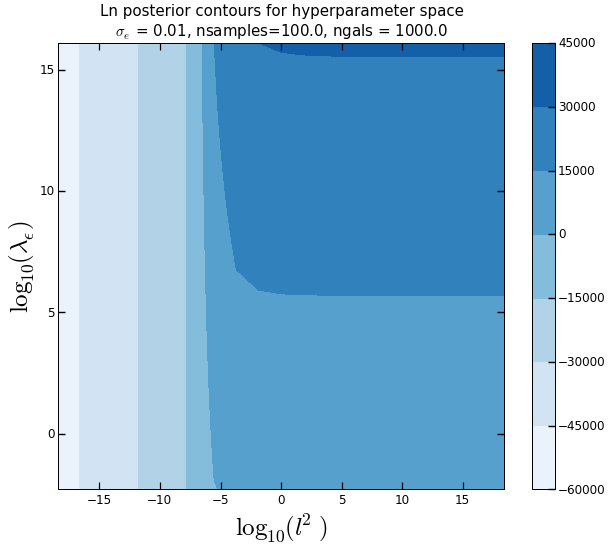

In [81]:
file1 = "/global/homes/k/karenyng/galsim_thresher_outputs/lnp_values_sigma_e_0.01_samples_100.0_ngals_1000.0.txt"
sigma_e, nsamples, ngals = get_params(file1)

print (sigma_e, nsamples, ngals)
# %load /global/homes/k/karenyng/galsim_thresher_outputs/lnp_values_sigma_e_0.01_samples_100.0_ngals_1000.0.txt
gp_hps = [ 
1.0,1e-08,0.1,1.0,1e-08,0.251188643151,1.0,1e-08,0.63095734448,1.0,1e-08,1.58489319246,1.0,1e-08,3.98107170553,1.0,1e-08,10.0,1.0,1e-08,25.1188643151,1.0,1e-08,63.095734448,1.0,1e-08,158.489319246,1.0,1e-08,398.107170553,1.0,1e-08,1000.0,1.0,1e-08,2511.88643151,1.0,1e-08,6309.5734448,1.0,1e-08,15848.9319246,1.0,1e-08,39810.7170553,1.0,1e-08,100000.0,1.0,1e-08,251188.643151,1.0,1e-08,630957.34448,1.0,1e-08,1584893.19246,1.0,1e-08,3981071.70553,1.0,1e-08,10000000.0,1.0,6.3095734448e-08,0.1,1.0,6.3095734448e-08,0.251188643151,1.0,6.3095734448e-08,0.63095734448,1.0,6.3095734448e-08,1.58489319246,1.0,6.3095734448e-08,3.98107170553,1.0,6.3095734448e-08,10.0,1.0,6.3095734448e-08,25.1188643151,1.0,6.3095734448e-08,63.095734448,1.0,6.3095734448e-08,158.489319246,1.0,6.3095734448e-08,398.107170553,1.0,6.3095734448e-08,1000.0,1.0,6.3095734448e-08,2511.88643151,1.0,6.3095734448e-08,6309.5734448,1.0,6.3095734448e-08,15848.9319246,1.0,6.3095734448e-08,39810.7170553,1.0,6.3095734448e-08,100000.0,1.0,6.3095734448e-08,251188.643151,1.0,6.3095734448e-08,630957.34448,1.0,6.3095734448e-08,1584893.19246,1.0,6.3095734448e-08,3981071.70553,1.0,6.3095734448e-08,10000000.0,1.0,3.98107170553e-07,0.1,1.0,3.98107170553e-07,0.251188643151,1.0,3.98107170553e-07,0.63095734448,1.0,3.98107170553e-07,1.58489319246,1.0,3.98107170553e-07,3.98107170553,1.0,3.98107170553e-07,10.0,1.0,3.98107170553e-07,25.1188643151,1.0,3.98107170553e-07,63.095734448,1.0,3.98107170553e-07,158.489319246,1.0,3.98107170553e-07,398.107170553,1.0,3.98107170553e-07,1000.0,1.0,3.98107170553e-07,2511.88643151,1.0,3.98107170553e-07,6309.5734448,1.0,3.98107170553e-07,15848.9319246,1.0,3.98107170553e-07,39810.7170553,1.0,3.98107170553e-07,100000.0,1.0,3.98107170553e-07,251188.643151,1.0,3.98107170553e-07,630957.34448,1.0,3.98107170553e-07,1584893.19246,1.0,3.98107170553e-07,3981071.70553,1.0,3.98107170553e-07,10000000.0,1.0,2.51188643151e-06,0.1,1.0,2.51188643151e-06,0.251188643151,1.0,2.51188643151e-06,0.63095734448,1.0,2.51188643151e-06,1.58489319246,1.0,2.51188643151e-06,3.98107170553,1.0,2.51188643151e-06,10.0,1.0,2.51188643151e-06,25.1188643151,1.0,2.51188643151e-06,63.095734448,1.0,2.51188643151e-06,158.489319246,1.0,2.51188643151e-06,398.107170553,1.0,2.51188643151e-06,1000.0,1.0,2.51188643151e-06,2511.88643151,1.0,2.51188643151e-06,6309.5734448,1.0,2.51188643151e-06,15848.9319246,1.0,2.51188643151e-06,39810.7170553,1.0,2.51188643151e-06,100000.0,1.0,2.51188643151e-06,251188.643151,1.0,2.51188643151e-06,630957.34448,1.0,2.51188643151e-06,1584893.19246,1.0,2.51188643151e-06,3981071.70553,1.0,2.51188643151e-06,10000000.0,1.0,1.58489319246e-05,0.1,1.0,1.58489319246e-05,0.251188643151,1.0,1.58489319246e-05,0.63095734448,1.0,1.58489319246e-05,1.58489319246,1.0,1.58489319246e-05,3.98107170553,1.0,1.58489319246e-05,10.0,1.0,1.58489319246e-05,25.1188643151,1.0,1.58489319246e-05,63.095734448,1.0,1.58489319246e-05,158.489319246,1.0,1.58489319246e-05,398.107170553,1.0,1.58489319246e-05,1000.0,1.0,1.58489319246e-05,2511.88643151,1.0,1.58489319246e-05,6309.5734448,1.0,1.58489319246e-05,15848.9319246,1.0,1.58489319246e-05,39810.7170553,1.0,1.58489319246e-05,100000.0,1.0,1.58489319246e-05,251188.643151,1.0,1.58489319246e-05,630957.34448,1.0,1.58489319246e-05,1584893.19246,1.0,1.58489319246e-05,3981071.70553,1.0,1.58489319246e-05,10000000.0,1.0,0.0001,0.1,1.0,0.0001,0.251188643151,1.0,0.0001,0.63095734448,1.0,0.0001,1.58489319246,1.0,0.0001,3.98107170553,1.0,0.0001,10.0,1.0,0.0001,25.1188643151,1.0,0.0001,63.095734448,1.0,0.0001,158.489319246,1.0,0.0001,398.107170553,1.0,0.0001,1000.0,1.0,0.0001,2511.88643151,1.0,0.0001,6309.5734448,1.0,0.0001,15848.9319246,1.0,0.0001,39810.7170553,1.0,0.0001,100000.0,1.0,0.0001,251188.643151,1.0,0.0001,630957.34448,1.0,0.0001,1584893.19246,1.0,0.0001,3981071.70553,1.0,0.0001,10000000.0,1.0,0.00063095734448,0.1,1.0,0.00063095734448,0.251188643151,1.0,0.00063095734448,0.63095734448,1.0,0.00063095734448,1.58489319246,1.0,0.00063095734448,3.98107170553,1.0,0.00063095734448,10.0,1.0,0.00063095734448,25.1188643151,1.0,0.00063095734448,63.095734448,1.0,0.00063095734448,158.489319246,1.0,0.00063095734448,398.107170553,1.0,0.00063095734448,1000.0,1.0,0.00063095734448,2511.88643151,1.0,0.00063095734448,6309.5734448,1.0,0.00063095734448,15848.9319246,1.0,0.00063095734448,39810.7170553,1.0,0.00063095734448,100000.0,1.0,0.00063095734448,251188.643151,1.0,0.00063095734448,630957.34448,1.0,0.00063095734448,1584893.19246,1.0,0.00063095734448,3981071.70553,1.0,0.00063095734448,10000000.0,1.0,0.00398107170553,0.1,1.0,0.00398107170553,0.251188643151,1.0,0.00398107170553,0.63095734448,1.0,0.00398107170553,1.58489319246,1.0,0.00398107170553,3.98107170553,1.0,0.00398107170553,10.0,1.0,0.00398107170553,25.1188643151,1.0,0.00398107170553,63.095734448,1.0,0.00398107170553,158.489319246,1.0,0.00398107170553,398.107170553,1.0,0.00398107170553,1000.0,1.0,0.00398107170553,2511.88643151,1.0,0.00398107170553,6309.5734448,1.0,0.00398107170553,15848.9319246,1.0,0.00398107170553,39810.7170553,1.0,0.00398107170553,100000.0,1.0,0.00398107170553,251188.643151,1.0,0.00398107170553,630957.34448,1.0,0.00398107170553,1584893.19246,1.0,0.00398107170553,3981071.70553,1.0,0.00398107170553,10000000.0,1.0,0.0251188643151,0.1,1.0,0.0251188643151,0.251188643151,1.0,0.0251188643151,0.63095734448,1.0,0.0251188643151,1.58489319246,1.0,0.0251188643151,3.98107170553,1.0,0.0251188643151,10.0,1.0,0.0251188643151,25.1188643151,1.0,0.0251188643151,63.095734448,1.0,0.0251188643151,158.489319246,1.0,0.0251188643151,398.107170553,1.0,0.0251188643151,1000.0,1.0,0.0251188643151,2511.88643151,1.0,0.0251188643151,6309.5734448,1.0,0.0251188643151,15848.9319246,1.0,0.0251188643151,39810.7170553,1.0,0.0251188643151,100000.0,1.0,0.0251188643151,251188.643151,1.0,0.0251188643151,630957.34448,1.0,0.0251188643151,1584893.19246,1.0,0.0251188643151,3981071.70553,1.0,0.0251188643151,10000000.0,1.0,0.158489319246,0.1,1.0,0.158489319246,0.251188643151,1.0,0.158489319246,0.63095734448,1.0,0.158489319246,1.58489319246,1.0,0.158489319246,3.98107170553,1.0,0.158489319246,10.0,1.0,0.158489319246,25.1188643151,1.0,0.158489319246,63.095734448,1.0,0.158489319246,158.489319246,1.0,0.158489319246,398.107170553,1.0,0.158489319246,1000.0,1.0,0.158489319246,2511.88643151,1.0,0.158489319246,6309.5734448,1.0,0.158489319246,15848.9319246,1.0,0.158489319246,39810.7170553,1.0,0.158489319246,100000.0,1.0,0.158489319246,251188.643151,1.0,0.158489319246,630957.34448,1.0,0.158489319246,1584893.19246,1.0,0.158489319246,3981071.70553,1.0,0.158489319246,10000000.0,1.0,1.0,0.1,1.0,1.0,0.251188643151,1.0,1.0,0.63095734448,1.0,1.0,1.58489319246,1.0,1.0,3.98107170553,1.0,1.0,10.0,1.0,1.0,25.1188643151,1.0,1.0,63.095734448,1.0,1.0,158.489319246,1.0,1.0,398.107170553,1.0,1.0,1000.0,1.0,1.0,2511.88643151,1.0,1.0,6309.5734448,1.0,1.0,15848.9319246,1.0,1.0,39810.7170553,1.0,1.0,100000.0,1.0,1.0,251188.643151,1.0,1.0,630957.34448,1.0,1.0,1584893.19246,1.0,1.0,3981071.70553,1.0,1.0,10000000.0,1.0,6.3095734448,0.1,1.0,6.3095734448,0.251188643151,1.0,6.3095734448,0.63095734448,1.0,6.3095734448,1.58489319246,1.0,6.3095734448,3.98107170553,1.0,6.3095734448,10.0,1.0,6.3095734448,25.1188643151,1.0,6.3095734448,63.095734448,1.0,6.3095734448,158.489319246,1.0,6.3095734448,398.107170553,1.0,6.3095734448,1000.0,1.0,6.3095734448,2511.88643151,1.0,6.3095734448,6309.5734448,1.0,6.3095734448,15848.9319246,1.0,6.3095734448,39810.7170553,1.0,6.3095734448,100000.0,1.0,6.3095734448,251188.643151,1.0,6.3095734448,630957.34448,1.0,6.3095734448,1584893.19246,1.0,6.3095734448,3981071.70553,1.0,6.3095734448,10000000.0,1.0,39.8107170553,0.1,1.0,39.8107170553,0.251188643151,1.0,39.8107170553,0.63095734448,1.0,39.8107170553,1.58489319246,1.0,39.8107170553,3.98107170553,1.0,39.8107170553,10.0,1.0,39.8107170553,25.1188643151,1.0,39.8107170553,63.095734448,1.0,39.8107170553,158.489319246,1.0,39.8107170553,398.107170553,1.0,39.8107170553,1000.0,1.0,39.8107170553,2511.88643151,1.0,39.8107170553,6309.5734448,1.0,39.8107170553,15848.9319246,1.0,39.8107170553,39810.7170553,1.0,39.8107170553,100000.0,1.0,39.8107170553,251188.643151,1.0,39.8107170553,630957.34448,1.0,39.8107170553,1584893.19246,1.0,39.8107170553,3981071.70553,1.0,39.8107170553,10000000.0,1.0,251.188643151,0.1,1.0,251.188643151,0.251188643151,1.0,251.188643151,0.63095734448,1.0,251.188643151,1.58489319246,1.0,251.188643151,3.98107170553,1.0,251.188643151,10.0,1.0,251.188643151,25.1188643151,1.0,251.188643151,63.095734448,1.0,251.188643151,158.489319246,1.0,251.188643151,398.107170553,1.0,251.188643151,1000.0,1.0,251.188643151,2511.88643151,1.0,251.188643151,6309.5734448,1.0,251.188643151,15848.9319246,1.0,251.188643151,39810.7170553,1.0,251.188643151,100000.0,1.0,251.188643151,251188.643151,1.0,251.188643151,630957.34448,1.0,251.188643151,1584893.19246,1.0,251.188643151,3981071.70553,1.0,251.188643151,10000000.0,1.0,1584.89319246,0.1,1.0,1584.89319246,0.251188643151,1.0,1584.89319246,0.63095734448,1.0,1584.89319246,1.58489319246,1.0,1584.89319246,3.98107170553,1.0,1584.89319246,10.0,1.0,1584.89319246,25.1188643151,1.0,1584.89319246,63.095734448,1.0,1584.89319246,158.489319246,1.0,1584.89319246,398.107170553,1.0,1584.89319246,1000.0,1.0,1584.89319246,2511.88643151,1.0,1584.89319246,6309.5734448,1.0,1584.89319246,15848.9319246,1.0,1584.89319246,39810.7170553,1.0,1584.89319246,100000.0,1.0,1584.89319246,251188.643151,1.0,1584.89319246,630957.34448,1.0,1584.89319246,1584893.19246,1.0,1584.89319246,3981071.70553,1.0,1584.89319246,10000000.0,1.0,10000.0,0.1,1.0,10000.0,0.251188643151,1.0,10000.0,0.63095734448,1.0,10000.0,1.58489319246,1.0,10000.0,3.98107170553,1.0,10000.0,10.0,1.0,10000.0,25.1188643151,1.0,10000.0,63.095734448,1.0,10000.0,158.489319246,1.0,10000.0,398.107170553,1.0,10000.0,1000.0,1.0,10000.0,2511.88643151,1.0,10000.0,6309.5734448,1.0,10000.0,15848.9319246,1.0,10000.0,39810.7170553,1.0,10000.0,100000.0,1.0,10000.0,251188.643151,1.0,10000.0,630957.34448,1.0,10000.0,1584893.19246,1.0,10000.0,3981071.70553,1.0,10000.0,10000000.0,1.0,63095.734448,0.1,1.0,63095.734448,0.251188643151,1.0,63095.734448,0.63095734448,1.0,63095.734448,1.58489319246,1.0,63095.734448,3.98107170553,1.0,63095.734448,10.0,1.0,63095.734448,25.1188643151,1.0,63095.734448,63.095734448,1.0,63095.734448,158.489319246,1.0,63095.734448,398.107170553,1.0,63095.734448,1000.0,1.0,63095.734448,2511.88643151,1.0,63095.734448,6309.5734448,1.0,63095.734448,15848.9319246,1.0,63095.734448,39810.7170553,1.0,63095.734448,100000.0,1.0,63095.734448,251188.643151,1.0,63095.734448,630957.34448,1.0,63095.734448,1584893.19246,1.0,63095.734448,3981071.70553,1.0,63095.734448,10000000.0,1.0,398107.170553,0.1,1.0,398107.170553,0.251188643151,1.0,398107.170553,0.63095734448,1.0,398107.170553,1.58489319246,1.0,398107.170553,3.98107170553,1.0,398107.170553,10.0,1.0,398107.170553,25.1188643151,1.0,398107.170553,63.095734448,1.0,398107.170553,158.489319246,1.0,398107.170553,398.107170553,1.0,398107.170553,1000.0,1.0,398107.170553,2511.88643151,1.0,398107.170553,6309.5734448,1.0,398107.170553,15848.9319246,1.0,398107.170553,39810.7170553,1.0,398107.170553,100000.0,1.0,398107.170553,251188.643151,1.0,398107.170553,630957.34448,1.0,398107.170553,1584893.19246,1.0,398107.170553,3981071.70553,1.0,398107.170553,10000000.0,1.0,2511886.43151,0.1,1.0,2511886.43151,0.251188643151,1.0,2511886.43151,0.63095734448,1.0,2511886.43151,1.58489319246,1.0,2511886.43151,3.98107170553,1.0,2511886.43151,10.0,1.0,2511886.43151,25.1188643151,1.0,2511886.43151,63.095734448,1.0,2511886.43151,158.489319246,1.0,2511886.43151,398.107170553,1.0,2511886.43151,1000.0,1.0,2511886.43151,2511.88643151,1.0,2511886.43151,6309.5734448,1.0,2511886.43151,15848.9319246,1.0,2511886.43151,39810.7170553,1.0,2511886.43151,100000.0,1.0,2511886.43151,251188.643151,1.0,2511886.43151,630957.34448,1.0,2511886.43151,1584893.19246,1.0,2511886.43151,3981071.70553,1.0,2511886.43151,10000000.0,1.0,15848931.9246,0.1,1.0,15848931.9246,0.251188643151,1.0,15848931.9246,0.63095734448,1.0,15848931.9246,1.58489319246,1.0,15848931.9246,3.98107170553,1.0,15848931.9246,10.0,1.0,15848931.9246,25.1188643151,1.0,15848931.9246,63.095734448,1.0,15848931.9246,158.489319246,1.0,15848931.9246,398.107170553,1.0,15848931.9246,1000.0,1.0,15848931.9246,2511.88643151,1.0,15848931.9246,6309.5734448,1.0,15848931.9246,15848.9319246,1.0,15848931.9246,39810.7170553,1.0,15848931.9246,100000.0,1.0,15848931.9246,251188.643151,1.0,15848931.9246,630957.34448,1.0,15848931.9246,1584893.19246,1.0,15848931.9246,3981071.70553,1.0,15848931.9246,10000000.0,1.0,100000000.0,0.1,1.0,100000000.0,0.251188643151,1.0,100000000.0,0.63095734448,1.0,100000000.0,1.58489319246,1.0,100000000.0,3.98107170553,1.0,100000000.0,10.0,1.0,100000000.0,25.1188643151,1.0,100000000.0,63.095734448,1.0,100000000.0,158.489319246,1.0,100000000.0,398.107170553,1.0,100000000.0,1000.0,1.0,100000000.0,2511.88643151,1.0,100000000.0,6309.5734448,1.0,100000000.0,15848.9319246,1.0,100000000.0,39810.7170553,1.0,100000000.0,100000.0,1.0,100000000.0,251188.643151,1.0,100000000.0,630957.34448,1.0,100000000.0,1584893.19246,1.0,100000000.0,3981071.70553,1.0,100000000.0,10000000.0
]

ln_posteriors = [ 
-50195.7,-50195.7,-50195.7,-50195.7,-50195.7,-50195.7,-50195.7,-50195.7,-50195.7,-50195.7,-50195.7,-50195.7,-50195.7,-50195.7,-50195.7,-50195.7,-50195.7,-50195.7,-50195.7,-50195.7,-50195.7,-44581.0,-44581.0,-44581.0,-44581.0,-44581.0,-44581.0,-44581.0,-44581.0,-44581.0,-44581.0,-44581.0,-44581.0,-44581.0,-44581.0,-44581.0,-44581.0,-44581.0,-44581.0,-44581.0,-44581.0,-44581.0,-38964.8,-38964.8,-38964.8,-38964.8,-38964.8,-38964.8,-38964.8,-38964.8,-38964.8,-38964.8,-38964.8,-38964.8,-38964.8,-38964.8,-38964.8,-38964.8,-38964.8,-38964.8,-38964.8,-38964.8,-38964.8,-33340.8,-33340.8,-33340.8,-33340.8,-33340.8,-33340.8,-33340.8,-33340.8,-33340.8,-33340.8,-33340.8,-33340.8,-33340.8,-33340.8,-33340.8,-33340.8,-33340.8,-33340.8,-33340.8,-33340.8,-33340.8,-27671.2,-27671.2,-27671.2,-27671.2,-27671.2,-27671.2,-27671.2,-27671.2,-27671.2,-27671.2,-27671.2,-27671.2,-27671.2,-27671.2,-27671.2,-27671.2,-27671.2,-27671.2,-27671.2,-27671.2,-27671.2,-21701.1,-21701.1,-21701.1,-21701.1,-21701.1,-21701.1,-21701.1,-21701.1,-21701.1,-21701.1,-21701.1,-21701.1,-21701.1,-21701.1,-21701.1,-21701.1,-21701.1,-21701.1,-21701.1,-21701.1,-21701.1,-12819.9,-12798.9,-12784.3,-12774.5,-12768.2,-12764.4,-12762.2,-12761.2,-12760.7,-12760.5,-12760.4,-12760.4,-12760.3,-12760.3,-12760.3,-12760.3,-12760.3,-12760.3,-12760.3,-12760.3,-12760.3,-408.926,570.981,1527.62,2461.2,3371.85,4259.69,5124.84,5967.41,6787.55,7585.37,8361.02,9114.66,9846.44,10556.6,11245.2,11912.4,12558.5,13183.4,13787.5,14370.8,14933.6,2286.83,3606.47,4920.09,6227.67,7529.22,8824.72,10114.1,11397.5,12674.7,13945.8,15210.7,16469.5,17722.0,18968.4,20208.4,21442.1,22669.5,23890.5,25105.1,26313.2,27514.9,2705.79,4090.03,5472.33,6852.66,8231.0,9607.34,10981.7,12354.0,13724.2,15092.3,16458.4,17822.3,19184.0,20543.7,21901.1,23256.3,24609.3,25960.0,27308.4,28654.6,29998.4,2777.09,4175.37,5572.82,6969.41,8365.18,9760.15,11154.3,12547.5,13939.9,15331.3,16721.8,18111.4,19500.1,20887.7,22274.4,23660.2,25044.9,26428.6,27811.3,29192.8,30573.4,2791.09,4193.21,5594.85,6996.01,8396.77,9797.19,11197.2,12596.8,13995.8,15394.3,16792.4,18190.0,19587.1,20983.5,22379.4,23774.8,25169.9,26564.4,27958.3,29351.5,30744.2,2793.39,4196.88,5600.18,7003.21,8405.92,9808.34,11210.5,12612.4,14014.0,15415.1,16815.9,18216.5,19616.9,21017.1,22417.1,23816.6,25215.6,26614.2,28012.5,29410.6,30808.5,2793.51,4197.16,5600.8,7004.43,8408.01,9811.5,11214.8,12617.8,14020.6,15423.1,16825.4,18227.7,19629.7,21031.6,22433.1,23834.2,25235.0,26635.7,28036.1,29436.6,30836.9,2793.51,4197.17,5600.82,7004.48,8408.13,9811.78,11215.4,12619.1,14022.6,15426.1,16829.4,18232.5,19635.2,21037.7,22440.1,23842.4,25244.7,26646.8,28048.9,29450.8,30852.3,2793.51,4197.17,5600.82,7004.48,8408.14,9811.79,11215.4,12619.1,14022.8,15426.4,16830.1,18233.7,19637.3,21040.7,22444.1,23847.1,25249.8,26652.3,28054.7,29457.0,30859.3,2793.51,4197.17,5600.82,7004.48,8408.14,9811.79,11215.4,12619.1,14022.8,15426.4,16830.1,18233.7,19637.4,21041.0,22444.7,23848.3,25251.9,26655.4,28058.7,29461.7,30864.5,2793.51,4197.17,5600.82,7004.48,8408.14,9811.79,11215.4,12619.1,14022.8,15426.4,16830.1,18233.7,19637.4,21041.0,22444.7,23848.3,25252.0,26655.7,28059.3,29462.9,30866.5,2793.51,4197.17,5600.82,7004.48,8408.14,9811.79,11215.4,12619.1,14022.8,15426.4,16830.1,18233.7,19637.4,21041.0,22444.7,23848.4,25252.0,26655.7,28059.3,29463.0,30866.6,2793.51,4197.17,5600.82,7004.48,8408.14,9811.79,11215.4,12619.1,14022.8,15426.4,16830.1,18233.7,19637.4,21041.0,22444.7,23848.4,25252.0,26655.7,28059.3,29463.0,30866.6,2793.51,4197.17,5600.82,7004.48,8408.14,9811.79,11215.4,12619.1,14022.8,15426.4,16830.1,18233.7,19637.4,21041.0,22444.7,23848.4,25252.0,26655.7,28059.3,29463.0,30866.6
]
gp_prec, gp_corr_var, gp_err_prec, lnp_surface = \
    reshape_thresher_outputs(gp_hps, ln_posteriors)
plot_hp_space_contours(gp_corr_var, gp_err_prec, lnp_surface, 
                       ngals, sigma_e, nsamples)

The prior on $\lambda_\epsilon$ may still be too strong

## sigma_e = 0.01, samples= 100, ngals = 500.0

('0.01', '100.0', '500.0')


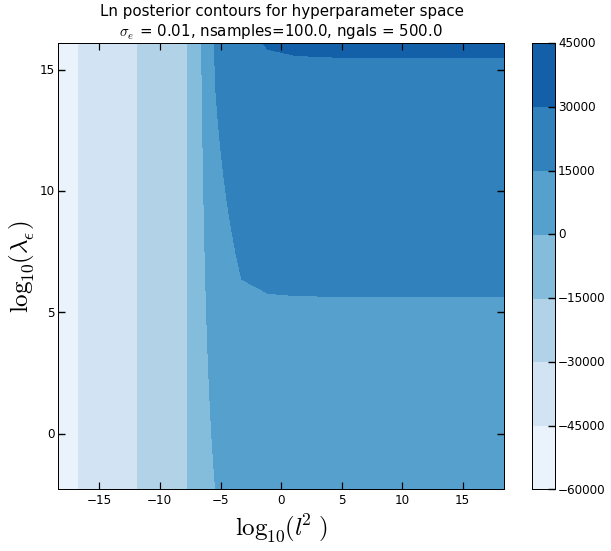

In [82]:
file1 = "/global/cscratch1/sd/karenyng/MagicBeans/outputs/lnp_values_sigma_e_0.01_samples_100.0_ngals_500.0.txt"
sigma_e, nsamples, ngals = get_params(file1)

print (sigma_e, nsamples, ngals)

# %load /global/cscratch1/sd/karenyng/MagicBeans/outputs/lnp_values_sigma_e_0.01_samples_10.0_ngals_1000.0.txt
gp_hps = [ 
1.0,1e-08,0.1,1.0,1e-08,0.29552092352,1.0,1e-08,0.873326162383,1.0,1e-08,2.58086154042,1.0,1e-08,7.62698585902,1.0,1e-08,22.5393390473,1.0,1e-08,66.6084629081,1.0,1e-08,196.841944729,1.0,1e-08,581.709132937,1.0,1e-08,1719.07220186,1.0,1e-08,5080.21804691,1.0,1e-08,15013.1072891,1.0,1e-08,44366.8733098,1.0,1e-08,131113.393742,1.0,1e-08,387467.512046,1.0,1e-08,1145047.56994,1.0,1e-08,3383855.15343,1.0,1e-08,10000000.0,1.0,8.73326162383e-08,0.1,1.0,8.73326162383e-08,0.29552092352,1.0,8.73326162383e-08,0.873326162383,1.0,8.73326162383e-08,2.58086154042,1.0,8.73326162383e-08,7.62698585902,1.0,8.73326162383e-08,22.5393390473,1.0,8.73326162383e-08,66.6084629081,1.0,8.73326162383e-08,196.841944729,1.0,8.73326162383e-08,581.709132937,1.0,8.73326162383e-08,1719.07220186,1.0,8.73326162383e-08,5080.21804691,1.0,8.73326162383e-08,15013.1072891,1.0,8.73326162383e-08,44366.8733098,1.0,8.73326162383e-08,131113.393742,1.0,8.73326162383e-08,387467.512046,1.0,8.73326162383e-08,1145047.56994,1.0,8.73326162383e-08,3383855.15343,1.0,8.73326162383e-08,10000000.0,1.0,7.62698585902e-07,0.1,1.0,7.62698585902e-07,0.29552092352,1.0,7.62698585902e-07,0.873326162383,1.0,7.62698585902e-07,2.58086154042,1.0,7.62698585902e-07,7.62698585902,1.0,7.62698585902e-07,22.5393390473,1.0,7.62698585902e-07,66.6084629081,1.0,7.62698585902e-07,196.841944729,1.0,7.62698585902e-07,581.709132937,1.0,7.62698585902e-07,1719.07220186,1.0,7.62698585902e-07,5080.21804691,1.0,7.62698585902e-07,15013.1072891,1.0,7.62698585902e-07,44366.8733098,1.0,7.62698585902e-07,131113.393742,1.0,7.62698585902e-07,387467.512046,1.0,7.62698585902e-07,1145047.56994,1.0,7.62698585902e-07,3383855.15343,1.0,7.62698585902e-07,10000000.0,1.0,6.66084629081e-06,0.1,1.0,6.66084629081e-06,0.29552092352,1.0,6.66084629081e-06,0.873326162383,1.0,6.66084629081e-06,2.58086154042,1.0,6.66084629081e-06,7.62698585902,1.0,6.66084629081e-06,22.5393390473,1.0,6.66084629081e-06,66.6084629081,1.0,6.66084629081e-06,196.841944729,1.0,6.66084629081e-06,581.709132937,1.0,6.66084629081e-06,1719.07220186,1.0,6.66084629081e-06,5080.21804691,1.0,6.66084629081e-06,15013.1072891,1.0,6.66084629081e-06,44366.8733098,1.0,6.66084629081e-06,131113.393742,1.0,6.66084629081e-06,387467.512046,1.0,6.66084629081e-06,1145047.56994,1.0,6.66084629081e-06,3383855.15343,1.0,6.66084629081e-06,10000000.0,1.0,5.81709132937e-05,0.1,1.0,5.81709132937e-05,0.29552092352,1.0,5.81709132937e-05,0.873326162383,1.0,5.81709132937e-05,2.58086154042,1.0,5.81709132937e-05,7.62698585902,1.0,5.81709132937e-05,22.5393390473,1.0,5.81709132937e-05,66.6084629081,1.0,5.81709132937e-05,196.841944729,1.0,5.81709132937e-05,581.709132937,1.0,5.81709132937e-05,1719.07220186,1.0,5.81709132937e-05,5080.21804691,1.0,5.81709132937e-05,15013.1072891,1.0,5.81709132937e-05,44366.8733098,1.0,5.81709132937e-05,131113.393742,1.0,5.81709132937e-05,387467.512046,1.0,5.81709132937e-05,1145047.56994,1.0,5.81709132937e-05,3383855.15343,1.0,5.81709132937e-05,10000000.0,1.0,0.000508021804691,0.1,1.0,0.000508021804691,0.29552092352,1.0,0.000508021804691,0.873326162383,1.0,0.000508021804691,2.58086154042,1.0,0.000508021804691,7.62698585902,1.0,0.000508021804691,22.5393390473,1.0,0.000508021804691,66.6084629081,1.0,0.000508021804691,196.841944729,1.0,0.000508021804691,581.709132937,1.0,0.000508021804691,1719.07220186,1.0,0.000508021804691,5080.21804691,1.0,0.000508021804691,15013.1072891,1.0,0.000508021804691,44366.8733098,1.0,0.000508021804691,131113.393742,1.0,0.000508021804691,387467.512046,1.0,0.000508021804691,1145047.56994,1.0,0.000508021804691,3383855.15343,1.0,0.000508021804691,10000000.0,1.0,0.00443668733098,0.1,1.0,0.00443668733098,0.29552092352,1.0,0.00443668733098,0.873326162383,1.0,0.00443668733098,2.58086154042,1.0,0.00443668733098,7.62698585902,1.0,0.00443668733098,22.5393390473,1.0,0.00443668733098,66.6084629081,1.0,0.00443668733098,196.841944729,1.0,0.00443668733098,581.709132937,1.0,0.00443668733098,1719.07220186,1.0,0.00443668733098,5080.21804691,1.0,0.00443668733098,15013.1072891,1.0,0.00443668733098,44366.8733098,1.0,0.00443668733098,131113.393742,1.0,0.00443668733098,387467.512046,1.0,0.00443668733098,1145047.56994,1.0,0.00443668733098,3383855.15343,1.0,0.00443668733098,10000000.0,1.0,0.0387467512046,0.1,1.0,0.0387467512046,0.29552092352,1.0,0.0387467512046,0.873326162383,1.0,0.0387467512046,2.58086154042,1.0,0.0387467512046,7.62698585902,1.0,0.0387467512046,22.5393390473,1.0,0.0387467512046,66.6084629081,1.0,0.0387467512046,196.841944729,1.0,0.0387467512046,581.709132937,1.0,0.0387467512046,1719.07220186,1.0,0.0387467512046,5080.21804691,1.0,0.0387467512046,15013.1072891,1.0,0.0387467512046,44366.8733098,1.0,0.0387467512046,131113.393742,1.0,0.0387467512046,387467.512046,1.0,0.0387467512046,1145047.56994,1.0,0.0387467512046,3383855.15343,1.0,0.0387467512046,10000000.0,1.0,0.338385515343,0.1,1.0,0.338385515343,0.29552092352,1.0,0.338385515343,0.873326162383,1.0,0.338385515343,2.58086154042,1.0,0.338385515343,7.62698585902,1.0,0.338385515343,22.5393390473,1.0,0.338385515343,66.6084629081,1.0,0.338385515343,196.841944729,1.0,0.338385515343,581.709132937,1.0,0.338385515343,1719.07220186,1.0,0.338385515343,5080.21804691,1.0,0.338385515343,15013.1072891,1.0,0.338385515343,44366.8733098,1.0,0.338385515343,131113.393742,1.0,0.338385515343,387467.512046,1.0,0.338385515343,1145047.56994,1.0,0.338385515343,3383855.15343,1.0,0.338385515343,10000000.0,1.0,2.9552092352,0.1,1.0,2.9552092352,0.29552092352,1.0,2.9552092352,0.873326162383,1.0,2.9552092352,2.58086154042,1.0,2.9552092352,7.62698585902,1.0,2.9552092352,22.5393390473,1.0,2.9552092352,66.6084629081,1.0,2.9552092352,196.841944729,1.0,2.9552092352,581.709132937,1.0,2.9552092352,1719.07220186,1.0,2.9552092352,5080.21804691,1.0,2.9552092352,15013.1072891,1.0,2.9552092352,44366.8733098,1.0,2.9552092352,131113.393742,1.0,2.9552092352,387467.512046,1.0,2.9552092352,1145047.56994,1.0,2.9552092352,3383855.15343,1.0,2.9552092352,10000000.0,1.0,25.8086154042,0.1,1.0,25.8086154042,0.29552092352,1.0,25.8086154042,0.873326162383,1.0,25.8086154042,2.58086154042,1.0,25.8086154042,7.62698585902,1.0,25.8086154042,22.5393390473,1.0,25.8086154042,66.6084629081,1.0,25.8086154042,196.841944729,1.0,25.8086154042,581.709132937,1.0,25.8086154042,1719.07220186,1.0,25.8086154042,5080.21804691,1.0,25.8086154042,15013.1072891,1.0,25.8086154042,44366.8733098,1.0,25.8086154042,131113.393742,1.0,25.8086154042,387467.512046,1.0,25.8086154042,1145047.56994,1.0,25.8086154042,3383855.15343,1.0,25.8086154042,10000000.0,1.0,225.393390473,0.1,1.0,225.393390473,0.29552092352,1.0,225.393390473,0.873326162383,1.0,225.393390473,2.58086154042,1.0,225.393390473,7.62698585902,1.0,225.393390473,22.5393390473,1.0,225.393390473,66.6084629081,1.0,225.393390473,196.841944729,1.0,225.393390473,581.709132937,1.0,225.393390473,1719.07220186,1.0,225.393390473,5080.21804691,1.0,225.393390473,15013.1072891,1.0,225.393390473,44366.8733098,1.0,225.393390473,131113.393742,1.0,225.393390473,387467.512046,1.0,225.393390473,1145047.56994,1.0,225.393390473,3383855.15343,1.0,225.393390473,10000000.0,1.0,1968.41944729,0.1,1.0,1968.41944729,0.29552092352,1.0,1968.41944729,0.873326162383,1.0,1968.41944729,2.58086154042,1.0,1968.41944729,7.62698585902,1.0,1968.41944729,22.5393390473,1.0,1968.41944729,66.6084629081,1.0,1968.41944729,196.841944729,1.0,1968.41944729,581.709132937,1.0,1968.41944729,1719.07220186,1.0,1968.41944729,5080.21804691,1.0,1968.41944729,15013.1072891,1.0,1968.41944729,44366.8733098,1.0,1968.41944729,131113.393742,1.0,1968.41944729,387467.512046,1.0,1968.41944729,1145047.56994,1.0,1968.41944729,3383855.15343,1.0,1968.41944729,10000000.0,1.0,17190.7220186,0.1,1.0,17190.7220186,0.29552092352,1.0,17190.7220186,0.873326162383,1.0,17190.7220186,2.58086154042,1.0,17190.7220186,7.62698585902,1.0,17190.7220186,22.5393390473,1.0,17190.7220186,66.6084629081,1.0,17190.7220186,196.841944729,1.0,17190.7220186,581.709132937,1.0,17190.7220186,1719.07220186,1.0,17190.7220186,5080.21804691,1.0,17190.7220186,15013.1072891,1.0,17190.7220186,44366.8733098,1.0,17190.7220186,131113.393742,1.0,17190.7220186,387467.512046,1.0,17190.7220186,1145047.56994,1.0,17190.7220186,3383855.15343,1.0,17190.7220186,10000000.0,1.0,150131.072891,0.1,1.0,150131.072891,0.29552092352,1.0,150131.072891,0.873326162383,1.0,150131.072891,2.58086154042,1.0,150131.072891,7.62698585902,1.0,150131.072891,22.5393390473,1.0,150131.072891,66.6084629081,1.0,150131.072891,196.841944729,1.0,150131.072891,581.709132937,1.0,150131.072891,1719.07220186,1.0,150131.072891,5080.21804691,1.0,150131.072891,15013.1072891,1.0,150131.072891,44366.8733098,1.0,150131.072891,131113.393742,1.0,150131.072891,387467.512046,1.0,150131.072891,1145047.56994,1.0,150131.072891,3383855.15343,1.0,150131.072891,10000000.0,1.0,1311133.93742,0.1,1.0,1311133.93742,0.29552092352,1.0,1311133.93742,0.873326162383,1.0,1311133.93742,2.58086154042,1.0,1311133.93742,7.62698585902,1.0,1311133.93742,22.5393390473,1.0,1311133.93742,66.6084629081,1.0,1311133.93742,196.841944729,1.0,1311133.93742,581.709132937,1.0,1311133.93742,1719.07220186,1.0,1311133.93742,5080.21804691,1.0,1311133.93742,15013.1072891,1.0,1311133.93742,44366.8733098,1.0,1311133.93742,131113.393742,1.0,1311133.93742,387467.512046,1.0,1311133.93742,1145047.56994,1.0,1311133.93742,3383855.15343,1.0,1311133.93742,10000000.0,1.0,11450475.6994,0.1,1.0,11450475.6994,0.29552092352,1.0,11450475.6994,0.873326162383,1.0,11450475.6994,2.58086154042,1.0,11450475.6994,7.62698585902,1.0,11450475.6994,22.5393390473,1.0,11450475.6994,66.6084629081,1.0,11450475.6994,196.841944729,1.0,11450475.6994,581.709132937,1.0,11450475.6994,1719.07220186,1.0,11450475.6994,5080.21804691,1.0,11450475.6994,15013.1072891,1.0,11450475.6994,44366.8733098,1.0,11450475.6994,131113.393742,1.0,11450475.6994,387467.512046,1.0,11450475.6994,1145047.56994,1.0,11450475.6994,3383855.15343,1.0,11450475.6994,10000000.0,1.0,100000000.0,0.1,1.0,100000000.0,0.29552092352,1.0,100000000.0,0.873326162383,1.0,100000000.0,2.58086154042,1.0,100000000.0,7.62698585902,1.0,100000000.0,22.5393390473,1.0,100000000.0,66.6084629081,1.0,100000000.0,196.841944729,1.0,100000000.0,581.709132937,1.0,100000000.0,1719.07220186,1.0,100000000.0,5080.21804691,1.0,100000000.0,15013.1072891,1.0,100000000.0,44366.8733098,1.0,100000000.0,131113.393742,1.0,100000000.0,387467.512046,1.0,100000000.0,1145047.56994,1.0,100000000.0,3383855.15343,1.0,100000000.0,10000000.0
]

ln_posteriors = [ 
-50132.3,-50132.3,-50132.3,-50132.3,-50132.3,-50132.3,-50132.3,-50132.3,-50132.3,-50132.3,-50132.3,-50132.3,-50132.3,-50132.3,-50132.3,-50132.3,-50132.3,-50132.3,-43526.9,-43526.9,-43526.9,-43526.9,-43526.9,-43526.9,-43526.9,-43526.9,-43526.9,-43526.9,-43526.9,-43526.9,-43526.9,-43526.9,-43526.9,-43526.9,-43526.9,-43526.9,-36920.7,-36920.7,-36920.7,-36920.7,-36920.7,-36920.7,-36920.7,-36920.7,-36920.7,-36920.7,-36920.7,-36920.7,-36920.7,-36920.7,-36920.7,-36920.7,-36920.7,-36920.7,-30298.0,-30298.0,-30298.0,-30298.0,-30298.0,-30298.0,-30298.0,-30298.0,-30298.0,-30298.0,-30298.0,-30298.0,-30298.0,-30298.0,-30298.0,-30298.0,-30298.0,-30298.0,-23501.2,-23501.2,-23501.2,-23501.2,-23501.2,-23501.2,-23501.2,-23501.2,-23501.2,-23501.2,-23501.2,-23501.2,-23501.2,-23501.2,-23501.2,-23501.2,-23501.2,-23501.2,-14468.7,-14464.8,-14462.7,-14461.8,-14461.4,-14461.3,-14461.2,-14461.2,-14461.2,-14461.2,-14461.2,-14461.2,-14461.2,-14461.2,-14461.2,-14461.2,-14461.2,-14461.2,-45.2604,1145.79,2306.63,3437.53,4538.68,5610.16,6652.05,7664.42,8647.36,9601.03,10525.6,11421.2,12287.9,13126.0,13935.6,14716.8,15469.8,16194.8,2521.53,4103.08,5678.35,7247.31,8809.94,10366.2,11916.1,13459.6,14996.5,16527.0,18050.8,19567.9,21078.3,22582.0,24078.8,25568.7,27051.7,28527.7,2812.31,4450.15,6086.14,7720.28,9352.54,10982.9,12611.4,14237.8,15862.3,17484.8,19105.2,20723.5,22339.7,23953.8,25565.6,27175.3,28782.7,30387.8,2851.03,4499.16,6146.62,7793.36,9439.25,11084.3,12728.6,14372.0,16014.5,17656.2,19297.1,20937.1,22576.1,24214.2,25851.4,27487.5,29122.6,30756.8,2856.64,4507.57,6158.1,7808.18,9457.85,11107.1,12755.7,14403.9,16051.6,17699.1,19346.3,20992.9,22638.8,24284.1,25929.0,27573.6,29217.6,30860.9,2856.91,4508.26,6159.6,7810.89,9462.08,11113.0,12763.6,14413.7,16063.6,17713.3,19362.8,21012.0,22660.6,24308.8,25956.6,27604.2,29251.8,30899.2,2856.91,4508.27,6159.63,7810.99,9462.35,11113.7,12765.0,14416.3,16067.5,17718.5,19369.0,21019.2,22669.1,24318.9,25968.6,27618.3,29267.7,30916.9,2856.91,4508.27,6159.63,7810.99,9462.35,11113.7,12765.1,14416.4,16067.8,17719.1,19370.5,21021.8,22673.0,24323.9,25974.5,27624.6,29274.5,30924.3,2856.91,4508.27,6159.63,7810.99,9462.35,11113.7,12765.1,14416.4,16067.8,17719.1,19370.5,21021.9,22673.2,24324.6,25975.9,27627.2,29278.4,30929.3,2856.91,4508.27,6159.63,7810.99,9462.35,11113.7,12765.1,14416.4,16067.8,17719.2,19370.5,21021.9,22673.2,24324.6,25975.9,27627.3,29278.7,30930.0,2856.91,4508.27,6159.63,7810.99,9462.35,11113.7,12765.1,14416.4,16067.8,17719.2,19370.5,21021.9,22673.2,24324.6,25975.9,27627.3,29278.7,30930.0,2856.91,4508.27,6159.63,7810.99,9462.35,11113.7,12765.1,14416.4,16067.8,17719.2,19370.5,21021.9,22673.2,24324.6,25975.9,27627.3,29278.7,30930.0
]

gp_prec, gp_corr_var, gp_err_prec, lnp_surface = \
    reshape_thresher_outputs(gp_hps, ln_posteriors)
plot_hp_space_contours(gp_corr_var, gp_err_prec, lnp_surface, 
                       ngals, sigma_e, nsamples)

## sigma_e = 0.01, samples= 10.0, ngals = 500.0

('0.01', '10.0', '500.0')


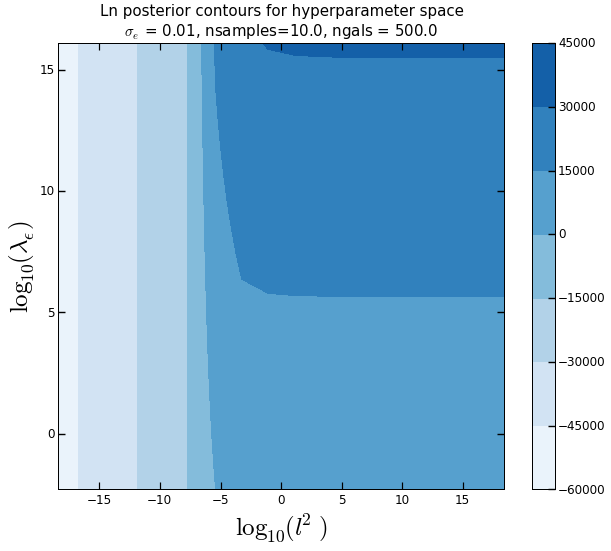

In [83]:
file1 = "/global/cscratch1/sd/karenyng/MagicBeans/outputs/lnp_values_sigma_e_0.01_samples_10.0_ngals_500.0.txt"
sigma_e, nsamples, ngals = get_params(file1)

print (sigma_e, nsamples, ngals)

# %load /global/cscratch1/sd/karenyng/MagicBeans/outputs/lnp_values_sigma_e_0.01_samples_10.0_ngals_1000.0.txt
gp_hps = [ 
1.0,1e-08,0.1,1.0,1e-08,0.29552092352,1.0,1e-08,0.873326162383,1.0,1e-08,2.58086154042,1.0,1e-08,7.62698585902,1.0,1e-08,22.5393390473,1.0,1e-08,66.6084629081,1.0,1e-08,196.841944729,1.0,1e-08,581.709132937,1.0,1e-08,1719.07220186,1.0,1e-08,5080.21804691,1.0,1e-08,15013.1072891,1.0,1e-08,44366.8733098,1.0,1e-08,131113.393742,1.0,1e-08,387467.512046,1.0,1e-08,1145047.56994,1.0,1e-08,3383855.15343,1.0,1e-08,10000000.0,1.0,8.73326162383e-08,0.1,1.0,8.73326162383e-08,0.29552092352,1.0,8.73326162383e-08,0.873326162383,1.0,8.73326162383e-08,2.58086154042,1.0,8.73326162383e-08,7.62698585902,1.0,8.73326162383e-08,22.5393390473,1.0,8.73326162383e-08,66.6084629081,1.0,8.73326162383e-08,196.841944729,1.0,8.73326162383e-08,581.709132937,1.0,8.73326162383e-08,1719.07220186,1.0,8.73326162383e-08,5080.21804691,1.0,8.73326162383e-08,15013.1072891,1.0,8.73326162383e-08,44366.8733098,1.0,8.73326162383e-08,131113.393742,1.0,8.73326162383e-08,387467.512046,1.0,8.73326162383e-08,1145047.56994,1.0,8.73326162383e-08,3383855.15343,1.0,8.73326162383e-08,10000000.0,1.0,7.62698585902e-07,0.1,1.0,7.62698585902e-07,0.29552092352,1.0,7.62698585902e-07,0.873326162383,1.0,7.62698585902e-07,2.58086154042,1.0,7.62698585902e-07,7.62698585902,1.0,7.62698585902e-07,22.5393390473,1.0,7.62698585902e-07,66.6084629081,1.0,7.62698585902e-07,196.841944729,1.0,7.62698585902e-07,581.709132937,1.0,7.62698585902e-07,1719.07220186,1.0,7.62698585902e-07,5080.21804691,1.0,7.62698585902e-07,15013.1072891,1.0,7.62698585902e-07,44366.8733098,1.0,7.62698585902e-07,131113.393742,1.0,7.62698585902e-07,387467.512046,1.0,7.62698585902e-07,1145047.56994,1.0,7.62698585902e-07,3383855.15343,1.0,7.62698585902e-07,10000000.0,1.0,6.66084629081e-06,0.1,1.0,6.66084629081e-06,0.29552092352,1.0,6.66084629081e-06,0.873326162383,1.0,6.66084629081e-06,2.58086154042,1.0,6.66084629081e-06,7.62698585902,1.0,6.66084629081e-06,22.5393390473,1.0,6.66084629081e-06,66.6084629081,1.0,6.66084629081e-06,196.841944729,1.0,6.66084629081e-06,581.709132937,1.0,6.66084629081e-06,1719.07220186,1.0,6.66084629081e-06,5080.21804691,1.0,6.66084629081e-06,15013.1072891,1.0,6.66084629081e-06,44366.8733098,1.0,6.66084629081e-06,131113.393742,1.0,6.66084629081e-06,387467.512046,1.0,6.66084629081e-06,1145047.56994,1.0,6.66084629081e-06,3383855.15343,1.0,6.66084629081e-06,10000000.0,1.0,5.81709132937e-05,0.1,1.0,5.81709132937e-05,0.29552092352,1.0,5.81709132937e-05,0.873326162383,1.0,5.81709132937e-05,2.58086154042,1.0,5.81709132937e-05,7.62698585902,1.0,5.81709132937e-05,22.5393390473,1.0,5.81709132937e-05,66.6084629081,1.0,5.81709132937e-05,196.841944729,1.0,5.81709132937e-05,581.709132937,1.0,5.81709132937e-05,1719.07220186,1.0,5.81709132937e-05,5080.21804691,1.0,5.81709132937e-05,15013.1072891,1.0,5.81709132937e-05,44366.8733098,1.0,5.81709132937e-05,131113.393742,1.0,5.81709132937e-05,387467.512046,1.0,5.81709132937e-05,1145047.56994,1.0,5.81709132937e-05,3383855.15343,1.0,5.81709132937e-05,10000000.0,1.0,0.000508021804691,0.1,1.0,0.000508021804691,0.29552092352,1.0,0.000508021804691,0.873326162383,1.0,0.000508021804691,2.58086154042,1.0,0.000508021804691,7.62698585902,1.0,0.000508021804691,22.5393390473,1.0,0.000508021804691,66.6084629081,1.0,0.000508021804691,196.841944729,1.0,0.000508021804691,581.709132937,1.0,0.000508021804691,1719.07220186,1.0,0.000508021804691,5080.21804691,1.0,0.000508021804691,15013.1072891,1.0,0.000508021804691,44366.8733098,1.0,0.000508021804691,131113.393742,1.0,0.000508021804691,387467.512046,1.0,0.000508021804691,1145047.56994,1.0,0.000508021804691,3383855.15343,1.0,0.000508021804691,10000000.0,1.0,0.00443668733098,0.1,1.0,0.00443668733098,0.29552092352,1.0,0.00443668733098,0.873326162383,1.0,0.00443668733098,2.58086154042,1.0,0.00443668733098,7.62698585902,1.0,0.00443668733098,22.5393390473,1.0,0.00443668733098,66.6084629081,1.0,0.00443668733098,196.841944729,1.0,0.00443668733098,581.709132937,1.0,0.00443668733098,1719.07220186,1.0,0.00443668733098,5080.21804691,1.0,0.00443668733098,15013.1072891,1.0,0.00443668733098,44366.8733098,1.0,0.00443668733098,131113.393742,1.0,0.00443668733098,387467.512046,1.0,0.00443668733098,1145047.56994,1.0,0.00443668733098,3383855.15343,1.0,0.00443668733098,10000000.0,1.0,0.0387467512046,0.1,1.0,0.0387467512046,0.29552092352,1.0,0.0387467512046,0.873326162383,1.0,0.0387467512046,2.58086154042,1.0,0.0387467512046,7.62698585902,1.0,0.0387467512046,22.5393390473,1.0,0.0387467512046,66.6084629081,1.0,0.0387467512046,196.841944729,1.0,0.0387467512046,581.709132937,1.0,0.0387467512046,1719.07220186,1.0,0.0387467512046,5080.21804691,1.0,0.0387467512046,15013.1072891,1.0,0.0387467512046,44366.8733098,1.0,0.0387467512046,131113.393742,1.0,0.0387467512046,387467.512046,1.0,0.0387467512046,1145047.56994,1.0,0.0387467512046,3383855.15343,1.0,0.0387467512046,10000000.0,1.0,0.338385515343,0.1,1.0,0.338385515343,0.29552092352,1.0,0.338385515343,0.873326162383,1.0,0.338385515343,2.58086154042,1.0,0.338385515343,7.62698585902,1.0,0.338385515343,22.5393390473,1.0,0.338385515343,66.6084629081,1.0,0.338385515343,196.841944729,1.0,0.338385515343,581.709132937,1.0,0.338385515343,1719.07220186,1.0,0.338385515343,5080.21804691,1.0,0.338385515343,15013.1072891,1.0,0.338385515343,44366.8733098,1.0,0.338385515343,131113.393742,1.0,0.338385515343,387467.512046,1.0,0.338385515343,1145047.56994,1.0,0.338385515343,3383855.15343,1.0,0.338385515343,10000000.0,1.0,2.9552092352,0.1,1.0,2.9552092352,0.29552092352,1.0,2.9552092352,0.873326162383,1.0,2.9552092352,2.58086154042,1.0,2.9552092352,7.62698585902,1.0,2.9552092352,22.5393390473,1.0,2.9552092352,66.6084629081,1.0,2.9552092352,196.841944729,1.0,2.9552092352,581.709132937,1.0,2.9552092352,1719.07220186,1.0,2.9552092352,5080.21804691,1.0,2.9552092352,15013.1072891,1.0,2.9552092352,44366.8733098,1.0,2.9552092352,131113.393742,1.0,2.9552092352,387467.512046,1.0,2.9552092352,1145047.56994,1.0,2.9552092352,3383855.15343,1.0,2.9552092352,10000000.0,1.0,25.8086154042,0.1,1.0,25.8086154042,0.29552092352,1.0,25.8086154042,0.873326162383,1.0,25.8086154042,2.58086154042,1.0,25.8086154042,7.62698585902,1.0,25.8086154042,22.5393390473,1.0,25.8086154042,66.6084629081,1.0,25.8086154042,196.841944729,1.0,25.8086154042,581.709132937,1.0,25.8086154042,1719.07220186,1.0,25.8086154042,5080.21804691,1.0,25.8086154042,15013.1072891,1.0,25.8086154042,44366.8733098,1.0,25.8086154042,131113.393742,1.0,25.8086154042,387467.512046,1.0,25.8086154042,1145047.56994,1.0,25.8086154042,3383855.15343,1.0,25.8086154042,10000000.0,1.0,225.393390473,0.1,1.0,225.393390473,0.29552092352,1.0,225.393390473,0.873326162383,1.0,225.393390473,2.58086154042,1.0,225.393390473,7.62698585902,1.0,225.393390473,22.5393390473,1.0,225.393390473,66.6084629081,1.0,225.393390473,196.841944729,1.0,225.393390473,581.709132937,1.0,225.393390473,1719.07220186,1.0,225.393390473,5080.21804691,1.0,225.393390473,15013.1072891,1.0,225.393390473,44366.8733098,1.0,225.393390473,131113.393742,1.0,225.393390473,387467.512046,1.0,225.393390473,1145047.56994,1.0,225.393390473,3383855.15343,1.0,225.393390473,10000000.0,1.0,1968.41944729,0.1,1.0,1968.41944729,0.29552092352,1.0,1968.41944729,0.873326162383,1.0,1968.41944729,2.58086154042,1.0,1968.41944729,7.62698585902,1.0,1968.41944729,22.5393390473,1.0,1968.41944729,66.6084629081,1.0,1968.41944729,196.841944729,1.0,1968.41944729,581.709132937,1.0,1968.41944729,1719.07220186,1.0,1968.41944729,5080.21804691,1.0,1968.41944729,15013.1072891,1.0,1968.41944729,44366.8733098,1.0,1968.41944729,131113.393742,1.0,1968.41944729,387467.512046,1.0,1968.41944729,1145047.56994,1.0,1968.41944729,3383855.15343,1.0,1968.41944729,10000000.0,1.0,17190.7220186,0.1,1.0,17190.7220186,0.29552092352,1.0,17190.7220186,0.873326162383,1.0,17190.7220186,2.58086154042,1.0,17190.7220186,7.62698585902,1.0,17190.7220186,22.5393390473,1.0,17190.7220186,66.6084629081,1.0,17190.7220186,196.841944729,1.0,17190.7220186,581.709132937,1.0,17190.7220186,1719.07220186,1.0,17190.7220186,5080.21804691,1.0,17190.7220186,15013.1072891,1.0,17190.7220186,44366.8733098,1.0,17190.7220186,131113.393742,1.0,17190.7220186,387467.512046,1.0,17190.7220186,1145047.56994,1.0,17190.7220186,3383855.15343,1.0,17190.7220186,10000000.0,1.0,150131.072891,0.1,1.0,150131.072891,0.29552092352,1.0,150131.072891,0.873326162383,1.0,150131.072891,2.58086154042,1.0,150131.072891,7.62698585902,1.0,150131.072891,22.5393390473,1.0,150131.072891,66.6084629081,1.0,150131.072891,196.841944729,1.0,150131.072891,581.709132937,1.0,150131.072891,1719.07220186,1.0,150131.072891,5080.21804691,1.0,150131.072891,15013.1072891,1.0,150131.072891,44366.8733098,1.0,150131.072891,131113.393742,1.0,150131.072891,387467.512046,1.0,150131.072891,1145047.56994,1.0,150131.072891,3383855.15343,1.0,150131.072891,10000000.0,1.0,1311133.93742,0.1,1.0,1311133.93742,0.29552092352,1.0,1311133.93742,0.873326162383,1.0,1311133.93742,2.58086154042,1.0,1311133.93742,7.62698585902,1.0,1311133.93742,22.5393390473,1.0,1311133.93742,66.6084629081,1.0,1311133.93742,196.841944729,1.0,1311133.93742,581.709132937,1.0,1311133.93742,1719.07220186,1.0,1311133.93742,5080.21804691,1.0,1311133.93742,15013.1072891,1.0,1311133.93742,44366.8733098,1.0,1311133.93742,131113.393742,1.0,1311133.93742,387467.512046,1.0,1311133.93742,1145047.56994,1.0,1311133.93742,3383855.15343,1.0,1311133.93742,10000000.0,1.0,11450475.6994,0.1,1.0,11450475.6994,0.29552092352,1.0,11450475.6994,0.873326162383,1.0,11450475.6994,2.58086154042,1.0,11450475.6994,7.62698585902,1.0,11450475.6994,22.5393390473,1.0,11450475.6994,66.6084629081,1.0,11450475.6994,196.841944729,1.0,11450475.6994,581.709132937,1.0,11450475.6994,1719.07220186,1.0,11450475.6994,5080.21804691,1.0,11450475.6994,15013.1072891,1.0,11450475.6994,44366.8733098,1.0,11450475.6994,131113.393742,1.0,11450475.6994,387467.512046,1.0,11450475.6994,1145047.56994,1.0,11450475.6994,3383855.15343,1.0,11450475.6994,10000000.0,1.0,100000000.0,0.1,1.0,100000000.0,0.29552092352,1.0,100000000.0,0.873326162383,1.0,100000000.0,2.58086154042,1.0,100000000.0,7.62698585902,1.0,100000000.0,22.5393390473,1.0,100000000.0,66.6084629081,1.0,100000000.0,196.841944729,1.0,100000000.0,581.709132937,1.0,100000000.0,1719.07220186,1.0,100000000.0,5080.21804691,1.0,100000000.0,15013.1072891,1.0,100000000.0,44366.8733098,1.0,100000000.0,131113.393742,1.0,100000000.0,387467.512046,1.0,100000000.0,1145047.56994,1.0,100000000.0,3383855.15343,1.0,100000000.0,10000000.0
]

ln_posteriors = [ 
-50132.3,-50132.3,-50132.3,-50132.3,-50132.3,-50132.3,-50132.3,-50132.3,-50132.3,-50132.3,-50132.3,-50132.3,-50132.3,-50132.3,-50132.3,-50132.3,-50132.3,-50132.3,-43526.9,-43526.9,-43526.9,-43526.9,-43526.9,-43526.9,-43526.9,-43526.9,-43526.9,-43526.9,-43526.9,-43526.9,-43526.9,-43526.9,-43526.9,-43526.9,-43526.9,-43526.9,-36920.7,-36920.7,-36920.7,-36920.7,-36920.7,-36920.7,-36920.7,-36920.7,-36920.7,-36920.7,-36920.7,-36920.7,-36920.7,-36920.7,-36920.7,-36920.7,-36920.7,-36920.7,-30298.0,-30298.0,-30298.0,-30298.0,-30298.0,-30298.0,-30298.0,-30298.0,-30298.0,-30298.0,-30298.0,-30298.0,-30298.0,-30298.0,-30298.0,-30298.0,-30298.0,-30298.0,-23501.2,-23501.2,-23501.2,-23501.2,-23501.2,-23501.2,-23501.2,-23501.2,-23501.2,-23501.2,-23501.2,-23501.2,-23501.2,-23501.2,-23501.2,-23501.2,-23501.2,-23501.2,-14468.7,-14464.8,-14462.7,-14461.8,-14461.4,-14461.3,-14461.2,-14461.2,-14461.2,-14461.2,-14461.2,-14461.2,-14461.2,-14461.2,-14461.2,-14461.2,-14461.2,-14461.2,-45.2604,1145.79,2306.63,3437.53,4538.68,5610.16,6652.05,7664.42,8647.36,9601.03,10525.6,11421.2,12287.9,13126.0,13935.6,14716.8,15469.8,16194.8,2521.53,4103.08,5678.35,7247.31,8809.94,10366.2,11916.1,13459.6,14996.5,16527.0,18050.8,19567.9,21078.3,22582.0,24078.8,25568.7,27051.7,28527.7,2812.31,4450.15,6086.14,7720.28,9352.54,10982.9,12611.4,14237.8,15862.3,17484.8,19105.2,20723.5,22339.7,23953.8,25565.6,27175.3,28782.7,30387.8,2851.03,4499.16,6146.62,7793.36,9439.25,11084.3,12728.6,14372.0,16014.5,17656.2,19297.1,20937.1,22576.1,24214.2,25851.4,27487.5,29122.6,30756.8,2856.64,4507.57,6158.1,7808.18,9457.85,11107.1,12755.7,14403.9,16051.6,17699.1,19346.3,20992.9,22638.8,24284.1,25929.0,27573.6,29217.6,30860.9,2856.91,4508.26,6159.6,7810.89,9462.08,11113.0,12763.6,14413.7,16063.6,17713.3,19362.8,21012.0,22660.6,24308.8,25956.6,27604.2,29251.8,30899.2,2856.91,4508.27,6159.63,7810.99,9462.35,11113.7,12765.0,14416.3,16067.5,17718.5,19369.0,21019.2,22669.1,24318.9,25968.6,27618.3,29267.7,30916.9,2856.91,4508.27,6159.63,7810.99,9462.35,11113.7,12765.1,14416.4,16067.8,17719.1,19370.5,21021.8,22673.0,24323.9,25974.5,27624.6,29274.5,30924.3,2856.91,4508.27,6159.63,7810.99,9462.35,11113.7,12765.1,14416.4,16067.8,17719.1,19370.5,21021.9,22673.2,24324.6,25975.9,27627.2,29278.4,30929.3,2856.91,4508.27,6159.63,7810.99,9462.35,11113.7,12765.1,14416.4,16067.8,17719.2,19370.5,21021.9,22673.2,24324.6,25975.9,27627.3,29278.7,30930.0,2856.91,4508.27,6159.63,7810.99,9462.35,11113.7,12765.1,14416.4,16067.8,17719.2,19370.5,21021.9,22673.2,24324.6,25975.9,27627.3,29278.7,30930.0,2856.91,4508.27,6159.63,7810.99,9462.35,11113.7,12765.1,14416.4,16067.8,17719.2,19370.5,21021.9,22673.2,24324.6,25975.9,27627.3,29278.7,30930.0
]

gp_prec, gp_corr_var, gp_err_prec, lnp_surface = \
    reshape_thresher_outputs(gp_hps, ln_posteriors)
plot_hp_space_contours(gp_corr_var, gp_err_prec, lnp_surface, 
                       ngals, sigma_e, nsamples)

In [84]:
## sigma_e = 0.01, samples= 10.0, ngals = 1000.0

('0.01', '10.0', '1000.0')


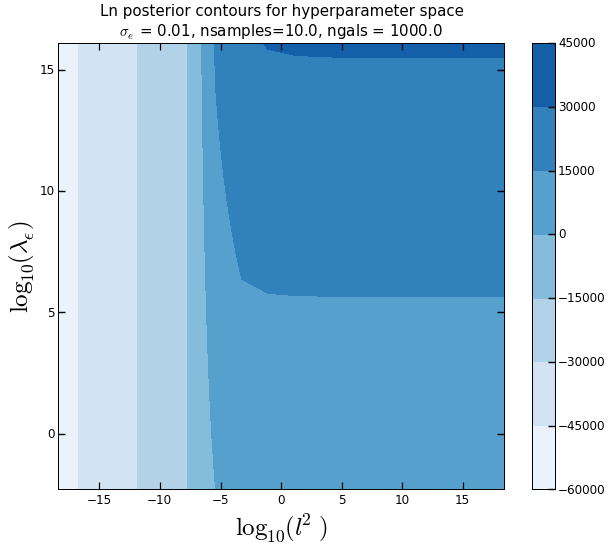

In [85]:
file1 = "/global/cscratch1/sd/karenyng/MagicBeans/outputs/lnp_values_sigma_e_0.01_samples_10.0_ngals_1000.0.txt"
sigma_e, nsamples, ngals = get_params(file1)

print (sigma_e, nsamples, ngals)

# %load /global/cscratch1/sd/karenyng/MagicBeans/outputs/lnp_values_sigma_e_0.01_samples_10.0_ngals_1000.0.txt
gp_hps = [ 
1.0,1e-08,0.1,1.0,1e-08,0.29552092352,1.0,1e-08,0.873326162383,1.0,1e-08,2.58086154042,1.0,1e-08,7.62698585902,1.0,1e-08,22.5393390473,1.0,1e-08,66.6084629081,1.0,1e-08,196.841944729,1.0,1e-08,581.709132937,1.0,1e-08,1719.07220186,1.0,1e-08,5080.21804691,1.0,1e-08,15013.1072891,1.0,1e-08,44366.8733098,1.0,1e-08,131113.393742,1.0,1e-08,387467.512046,1.0,1e-08,1145047.56994,1.0,1e-08,3383855.15343,1.0,1e-08,10000000.0,1.0,8.73326162383e-08,0.1,1.0,8.73326162383e-08,0.29552092352,1.0,8.73326162383e-08,0.873326162383,1.0,8.73326162383e-08,2.58086154042,1.0,8.73326162383e-08,7.62698585902,1.0,8.73326162383e-08,22.5393390473,1.0,8.73326162383e-08,66.6084629081,1.0,8.73326162383e-08,196.841944729,1.0,8.73326162383e-08,581.709132937,1.0,8.73326162383e-08,1719.07220186,1.0,8.73326162383e-08,5080.21804691,1.0,8.73326162383e-08,15013.1072891,1.0,8.73326162383e-08,44366.8733098,1.0,8.73326162383e-08,131113.393742,1.0,8.73326162383e-08,387467.512046,1.0,8.73326162383e-08,1145047.56994,1.0,8.73326162383e-08,3383855.15343,1.0,8.73326162383e-08,10000000.0,1.0,7.62698585902e-07,0.1,1.0,7.62698585902e-07,0.29552092352,1.0,7.62698585902e-07,0.873326162383,1.0,7.62698585902e-07,2.58086154042,1.0,7.62698585902e-07,7.62698585902,1.0,7.62698585902e-07,22.5393390473,1.0,7.62698585902e-07,66.6084629081,1.0,7.62698585902e-07,196.841944729,1.0,7.62698585902e-07,581.709132937,1.0,7.62698585902e-07,1719.07220186,1.0,7.62698585902e-07,5080.21804691,1.0,7.62698585902e-07,15013.1072891,1.0,7.62698585902e-07,44366.8733098,1.0,7.62698585902e-07,131113.393742,1.0,7.62698585902e-07,387467.512046,1.0,7.62698585902e-07,1145047.56994,1.0,7.62698585902e-07,3383855.15343,1.0,7.62698585902e-07,10000000.0,1.0,6.66084629081e-06,0.1,1.0,6.66084629081e-06,0.29552092352,1.0,6.66084629081e-06,0.873326162383,1.0,6.66084629081e-06,2.58086154042,1.0,6.66084629081e-06,7.62698585902,1.0,6.66084629081e-06,22.5393390473,1.0,6.66084629081e-06,66.6084629081,1.0,6.66084629081e-06,196.841944729,1.0,6.66084629081e-06,581.709132937,1.0,6.66084629081e-06,1719.07220186,1.0,6.66084629081e-06,5080.21804691,1.0,6.66084629081e-06,15013.1072891,1.0,6.66084629081e-06,44366.8733098,1.0,6.66084629081e-06,131113.393742,1.0,6.66084629081e-06,387467.512046,1.0,6.66084629081e-06,1145047.56994,1.0,6.66084629081e-06,3383855.15343,1.0,6.66084629081e-06,10000000.0,1.0,5.81709132937e-05,0.1,1.0,5.81709132937e-05,0.29552092352,1.0,5.81709132937e-05,0.873326162383,1.0,5.81709132937e-05,2.58086154042,1.0,5.81709132937e-05,7.62698585902,1.0,5.81709132937e-05,22.5393390473,1.0,5.81709132937e-05,66.6084629081,1.0,5.81709132937e-05,196.841944729,1.0,5.81709132937e-05,581.709132937,1.0,5.81709132937e-05,1719.07220186,1.0,5.81709132937e-05,5080.21804691,1.0,5.81709132937e-05,15013.1072891,1.0,5.81709132937e-05,44366.8733098,1.0,5.81709132937e-05,131113.393742,1.0,5.81709132937e-05,387467.512046,1.0,5.81709132937e-05,1145047.56994,1.0,5.81709132937e-05,3383855.15343,1.0,5.81709132937e-05,10000000.0,1.0,0.000508021804691,0.1,1.0,0.000508021804691,0.29552092352,1.0,0.000508021804691,0.873326162383,1.0,0.000508021804691,2.58086154042,1.0,0.000508021804691,7.62698585902,1.0,0.000508021804691,22.5393390473,1.0,0.000508021804691,66.6084629081,1.0,0.000508021804691,196.841944729,1.0,0.000508021804691,581.709132937,1.0,0.000508021804691,1719.07220186,1.0,0.000508021804691,5080.21804691,1.0,0.000508021804691,15013.1072891,1.0,0.000508021804691,44366.8733098,1.0,0.000508021804691,131113.393742,1.0,0.000508021804691,387467.512046,1.0,0.000508021804691,1145047.56994,1.0,0.000508021804691,3383855.15343,1.0,0.000508021804691,10000000.0,1.0,0.00443668733098,0.1,1.0,0.00443668733098,0.29552092352,1.0,0.00443668733098,0.873326162383,1.0,0.00443668733098,2.58086154042,1.0,0.00443668733098,7.62698585902,1.0,0.00443668733098,22.5393390473,1.0,0.00443668733098,66.6084629081,1.0,0.00443668733098,196.841944729,1.0,0.00443668733098,581.709132937,1.0,0.00443668733098,1719.07220186,1.0,0.00443668733098,5080.21804691,1.0,0.00443668733098,15013.1072891,1.0,0.00443668733098,44366.8733098,1.0,0.00443668733098,131113.393742,1.0,0.00443668733098,387467.512046,1.0,0.00443668733098,1145047.56994,1.0,0.00443668733098,3383855.15343,1.0,0.00443668733098,10000000.0,1.0,0.0387467512046,0.1,1.0,0.0387467512046,0.29552092352,1.0,0.0387467512046,0.873326162383,1.0,0.0387467512046,2.58086154042,1.0,0.0387467512046,7.62698585902,1.0,0.0387467512046,22.5393390473,1.0,0.0387467512046,66.6084629081,1.0,0.0387467512046,196.841944729,1.0,0.0387467512046,581.709132937,1.0,0.0387467512046,1719.07220186,1.0,0.0387467512046,5080.21804691,1.0,0.0387467512046,15013.1072891,1.0,0.0387467512046,44366.8733098,1.0,0.0387467512046,131113.393742,1.0,0.0387467512046,387467.512046,1.0,0.0387467512046,1145047.56994,1.0,0.0387467512046,3383855.15343,1.0,0.0387467512046,10000000.0,1.0,0.338385515343,0.1,1.0,0.338385515343,0.29552092352,1.0,0.338385515343,0.873326162383,1.0,0.338385515343,2.58086154042,1.0,0.338385515343,7.62698585902,1.0,0.338385515343,22.5393390473,1.0,0.338385515343,66.6084629081,1.0,0.338385515343,196.841944729,1.0,0.338385515343,581.709132937,1.0,0.338385515343,1719.07220186,1.0,0.338385515343,5080.21804691,1.0,0.338385515343,15013.1072891,1.0,0.338385515343,44366.8733098,1.0,0.338385515343,131113.393742,1.0,0.338385515343,387467.512046,1.0,0.338385515343,1145047.56994,1.0,0.338385515343,3383855.15343,1.0,0.338385515343,10000000.0,1.0,2.9552092352,0.1,1.0,2.9552092352,0.29552092352,1.0,2.9552092352,0.873326162383,1.0,2.9552092352,2.58086154042,1.0,2.9552092352,7.62698585902,1.0,2.9552092352,22.5393390473,1.0,2.9552092352,66.6084629081,1.0,2.9552092352,196.841944729,1.0,2.9552092352,581.709132937,1.0,2.9552092352,1719.07220186,1.0,2.9552092352,5080.21804691,1.0,2.9552092352,15013.1072891,1.0,2.9552092352,44366.8733098,1.0,2.9552092352,131113.393742,1.0,2.9552092352,387467.512046,1.0,2.9552092352,1145047.56994,1.0,2.9552092352,3383855.15343,1.0,2.9552092352,10000000.0,1.0,25.8086154042,0.1,1.0,25.8086154042,0.29552092352,1.0,25.8086154042,0.873326162383,1.0,25.8086154042,2.58086154042,1.0,25.8086154042,7.62698585902,1.0,25.8086154042,22.5393390473,1.0,25.8086154042,66.6084629081,1.0,25.8086154042,196.841944729,1.0,25.8086154042,581.709132937,1.0,25.8086154042,1719.07220186,1.0,25.8086154042,5080.21804691,1.0,25.8086154042,15013.1072891,1.0,25.8086154042,44366.8733098,1.0,25.8086154042,131113.393742,1.0,25.8086154042,387467.512046,1.0,25.8086154042,1145047.56994,1.0,25.8086154042,3383855.15343,1.0,25.8086154042,10000000.0,1.0,225.393390473,0.1,1.0,225.393390473,0.29552092352,1.0,225.393390473,0.873326162383,1.0,225.393390473,2.58086154042,1.0,225.393390473,7.62698585902,1.0,225.393390473,22.5393390473,1.0,225.393390473,66.6084629081,1.0,225.393390473,196.841944729,1.0,225.393390473,581.709132937,1.0,225.393390473,1719.07220186,1.0,225.393390473,5080.21804691,1.0,225.393390473,15013.1072891,1.0,225.393390473,44366.8733098,1.0,225.393390473,131113.393742,1.0,225.393390473,387467.512046,1.0,225.393390473,1145047.56994,1.0,225.393390473,3383855.15343,1.0,225.393390473,10000000.0,1.0,1968.41944729,0.1,1.0,1968.41944729,0.29552092352,1.0,1968.41944729,0.873326162383,1.0,1968.41944729,2.58086154042,1.0,1968.41944729,7.62698585902,1.0,1968.41944729,22.5393390473,1.0,1968.41944729,66.6084629081,1.0,1968.41944729,196.841944729,1.0,1968.41944729,581.709132937,1.0,1968.41944729,1719.07220186,1.0,1968.41944729,5080.21804691,1.0,1968.41944729,15013.1072891,1.0,1968.41944729,44366.8733098,1.0,1968.41944729,131113.393742,1.0,1968.41944729,387467.512046,1.0,1968.41944729,1145047.56994,1.0,1968.41944729,3383855.15343,1.0,1968.41944729,10000000.0,1.0,17190.7220186,0.1,1.0,17190.7220186,0.29552092352,1.0,17190.7220186,0.873326162383,1.0,17190.7220186,2.58086154042,1.0,17190.7220186,7.62698585902,1.0,17190.7220186,22.5393390473,1.0,17190.7220186,66.6084629081,1.0,17190.7220186,196.841944729,1.0,17190.7220186,581.709132937,1.0,17190.7220186,1719.07220186,1.0,17190.7220186,5080.21804691,1.0,17190.7220186,15013.1072891,1.0,17190.7220186,44366.8733098,1.0,17190.7220186,131113.393742,1.0,17190.7220186,387467.512046,1.0,17190.7220186,1145047.56994,1.0,17190.7220186,3383855.15343,1.0,17190.7220186,10000000.0,1.0,150131.072891,0.1,1.0,150131.072891,0.29552092352,1.0,150131.072891,0.873326162383,1.0,150131.072891,2.58086154042,1.0,150131.072891,7.62698585902,1.0,150131.072891,22.5393390473,1.0,150131.072891,66.6084629081,1.0,150131.072891,196.841944729,1.0,150131.072891,581.709132937,1.0,150131.072891,1719.07220186,1.0,150131.072891,5080.21804691,1.0,150131.072891,15013.1072891,1.0,150131.072891,44366.8733098,1.0,150131.072891,131113.393742,1.0,150131.072891,387467.512046,1.0,150131.072891,1145047.56994,1.0,150131.072891,3383855.15343,1.0,150131.072891,10000000.0,1.0,1311133.93742,0.1,1.0,1311133.93742,0.29552092352,1.0,1311133.93742,0.873326162383,1.0,1311133.93742,2.58086154042,1.0,1311133.93742,7.62698585902,1.0,1311133.93742,22.5393390473,1.0,1311133.93742,66.6084629081,1.0,1311133.93742,196.841944729,1.0,1311133.93742,581.709132937,1.0,1311133.93742,1719.07220186,1.0,1311133.93742,5080.21804691,1.0,1311133.93742,15013.1072891,1.0,1311133.93742,44366.8733098,1.0,1311133.93742,131113.393742,1.0,1311133.93742,387467.512046,1.0,1311133.93742,1145047.56994,1.0,1311133.93742,3383855.15343,1.0,1311133.93742,10000000.0,1.0,11450475.6994,0.1,1.0,11450475.6994,0.29552092352,1.0,11450475.6994,0.873326162383,1.0,11450475.6994,2.58086154042,1.0,11450475.6994,7.62698585902,1.0,11450475.6994,22.5393390473,1.0,11450475.6994,66.6084629081,1.0,11450475.6994,196.841944729,1.0,11450475.6994,581.709132937,1.0,11450475.6994,1719.07220186,1.0,11450475.6994,5080.21804691,1.0,11450475.6994,15013.1072891,1.0,11450475.6994,44366.8733098,1.0,11450475.6994,131113.393742,1.0,11450475.6994,387467.512046,1.0,11450475.6994,1145047.56994,1.0,11450475.6994,3383855.15343,1.0,11450475.6994,10000000.0,1.0,100000000.0,0.1,1.0,100000000.0,0.29552092352,1.0,100000000.0,0.873326162383,1.0,100000000.0,2.58086154042,1.0,100000000.0,7.62698585902,1.0,100000000.0,22.5393390473,1.0,100000000.0,66.6084629081,1.0,100000000.0,196.841944729,1.0,100000000.0,581.709132937,1.0,100000000.0,1719.07220186,1.0,100000000.0,5080.21804691,1.0,100000000.0,15013.1072891,1.0,100000000.0,44366.8733098,1.0,100000000.0,131113.393742,1.0,100000000.0,387467.512046,1.0,100000000.0,1145047.56994,1.0,100000000.0,3383855.15343,1.0,100000000.0,10000000.0
]

ln_posteriors = [ 
-50132.3,-50132.3,-50132.3,-50132.3,-50132.3,-50132.3,-50132.3,-50132.3,-50132.3,-50132.3,-50132.3,-50132.3,-50132.3,-50132.3,-50132.3,-50132.3,-50132.3,-50132.3,-43526.9,-43526.9,-43526.9,-43526.9,-43526.9,-43526.9,-43526.9,-43526.9,-43526.9,-43526.9,-43526.9,-43526.9,-43526.9,-43526.9,-43526.9,-43526.9,-43526.9,-43526.9,-36920.7,-36920.7,-36920.7,-36920.7,-36920.7,-36920.7,-36920.7,-36920.7,-36920.7,-36920.7,-36920.7,-36920.7,-36920.7,-36920.7,-36920.7,-36920.7,-36920.7,-36920.7,-30298.0,-30298.0,-30298.0,-30298.0,-30298.0,-30298.0,-30298.0,-30298.0,-30298.0,-30298.0,-30298.0,-30298.0,-30298.0,-30298.0,-30298.0,-30298.0,-30298.0,-30298.0,-23501.2,-23501.2,-23501.2,-23501.2,-23501.2,-23501.2,-23501.2,-23501.2,-23501.2,-23501.2,-23501.2,-23501.2,-23501.2,-23501.2,-23501.2,-23501.2,-23501.2,-23501.2,-14468.7,-14464.8,-14462.7,-14461.8,-14461.4,-14461.3,-14461.2,-14461.2,-14461.2,-14461.2,-14461.2,-14461.2,-14461.2,-14461.2,-14461.2,-14461.2,-14461.2,-14461.2,-45.2604,1145.79,2306.63,3437.53,4538.68,5610.16,6652.05,7664.42,8647.36,9601.03,10525.6,11421.2,12287.9,13126.0,13935.6,14716.8,15469.8,16194.8,2521.53,4103.08,5678.35,7247.31,8809.94,10366.2,11916.1,13459.6,14996.5,16527.0,18050.8,19567.9,21078.3,22582.0,24078.8,25568.7,27051.7,28527.7,2812.31,4450.15,6086.14,7720.28,9352.54,10982.9,12611.4,14237.8,15862.3,17484.8,19105.2,20723.5,22339.7,23953.8,25565.6,27175.3,28782.7,30387.8,2851.03,4499.16,6146.62,7793.36,9439.25,11084.3,12728.6,14372.0,16014.5,17656.2,19297.1,20937.1,22576.1,24214.2,25851.4,27487.5,29122.6,30756.8,2856.64,4507.57,6158.1,7808.18,9457.85,11107.1,12755.7,14403.9,16051.6,17699.1,19346.3,20992.9,22638.8,24284.1,25929.0,27573.6,29217.6,30860.9,2856.91,4508.26,6159.6,7810.89,9462.08,11113.0,12763.6,14413.7,16063.6,17713.3,19362.8,21012.0,22660.6,24308.8,25956.6,27604.2,29251.8,30899.2,2856.91,4508.27,6159.63,7810.99,9462.35,11113.7,12765.0,14416.3,16067.5,17718.5,19369.0,21019.2,22669.1,24318.9,25968.6,27618.3,29267.7,30916.9,2856.91,4508.27,6159.63,7810.99,9462.35,11113.7,12765.1,14416.4,16067.8,17719.1,19370.5,21021.8,22673.0,24323.9,25974.5,27624.6,29274.5,30924.3,2856.91,4508.27,6159.63,7810.99,9462.35,11113.7,12765.1,14416.4,16067.8,17719.1,19370.5,21021.9,22673.2,24324.6,25975.9,27627.2,29278.4,30929.3,2856.91,4508.27,6159.63,7810.99,9462.35,11113.7,12765.1,14416.4,16067.8,17719.2,19370.5,21021.9,22673.2,24324.6,25975.9,27627.3,29278.7,30930.0,2856.91,4508.27,6159.63,7810.99,9462.35,11113.7,12765.1,14416.4,16067.8,17719.2,19370.5,21021.9,22673.2,24324.6,25975.9,27627.3,29278.7,30930.0,2856.91,4508.27,6159.63,7810.99,9462.35,11113.7,12765.1,14416.4,16067.8,17719.2,19370.5,21021.9,22673.2,24324.6,25975.9,27627.3,29278.7,30930.0
]

gp_prec, gp_corr_var, gp_err_prec, lnp_surface = \
    reshape_thresher_outputs(gp_hps, ln_posteriors)
plot_hp_space_contours(gp_corr_var, gp_err_prec, lnp_surface, 
                       ngals, sigma_e, nsamples)

## sigma_e = 0.258, samples= 10.0, ngals = 1000.0

('0.258', '10.0', '1000.0')


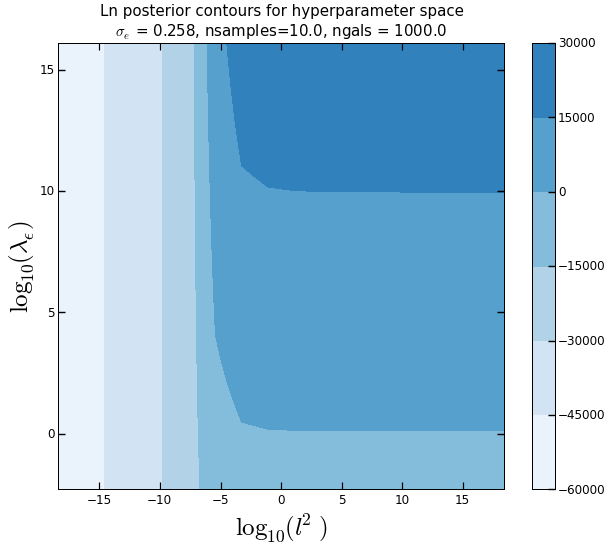

In [86]:
file1 = "/global/cscratch1/sd/karenyng/MagicBeans/outputs/lnp_values_sigma_e_0.258_samples_10.0_ngals_1000.0.txt"
sigma_e, nsamples, ngals = get_params(file1)

print (sigma_e, nsamples, ngals)

# %load /global/cscratch1/sd/karenyng/MagicBeans/outputs/lnp_values_sigma_e_0.258_samples_10.0_ngals_1000.0.txt
gp_hps = [ 
1.0,1e-08,0.1,1.0,1e-08,0.29552092352,1.0,1e-08,0.873326162383,1.0,1e-08,2.58086154042,1.0,1e-08,7.62698585902,1.0,1e-08,22.5393390473,1.0,1e-08,66.6084629081,1.0,1e-08,196.841944729,1.0,1e-08,581.709132937,1.0,1e-08,1719.07220186,1.0,1e-08,5080.21804691,1.0,1e-08,15013.1072891,1.0,1e-08,44366.8733098,1.0,1e-08,131113.393742,1.0,1e-08,387467.512046,1.0,1e-08,1145047.56994,1.0,1e-08,3383855.15343,1.0,1e-08,10000000.0,1.0,8.73326162383e-08,0.1,1.0,8.73326162383e-08,0.29552092352,1.0,8.73326162383e-08,0.873326162383,1.0,8.73326162383e-08,2.58086154042,1.0,8.73326162383e-08,7.62698585902,1.0,8.73326162383e-08,22.5393390473,1.0,8.73326162383e-08,66.6084629081,1.0,8.73326162383e-08,196.841944729,1.0,8.73326162383e-08,581.709132937,1.0,8.73326162383e-08,1719.07220186,1.0,8.73326162383e-08,5080.21804691,1.0,8.73326162383e-08,15013.1072891,1.0,8.73326162383e-08,44366.8733098,1.0,8.73326162383e-08,131113.393742,1.0,8.73326162383e-08,387467.512046,1.0,8.73326162383e-08,1145047.56994,1.0,8.73326162383e-08,3383855.15343,1.0,8.73326162383e-08,10000000.0,1.0,7.62698585902e-07,0.1,1.0,7.62698585902e-07,0.29552092352,1.0,7.62698585902e-07,0.873326162383,1.0,7.62698585902e-07,2.58086154042,1.0,7.62698585902e-07,7.62698585902,1.0,7.62698585902e-07,22.5393390473,1.0,7.62698585902e-07,66.6084629081,1.0,7.62698585902e-07,196.841944729,1.0,7.62698585902e-07,581.709132937,1.0,7.62698585902e-07,1719.07220186,1.0,7.62698585902e-07,5080.21804691,1.0,7.62698585902e-07,15013.1072891,1.0,7.62698585902e-07,44366.8733098,1.0,7.62698585902e-07,131113.393742,1.0,7.62698585902e-07,387467.512046,1.0,7.62698585902e-07,1145047.56994,1.0,7.62698585902e-07,3383855.15343,1.0,7.62698585902e-07,10000000.0,1.0,6.66084629081e-06,0.1,1.0,6.66084629081e-06,0.29552092352,1.0,6.66084629081e-06,0.873326162383,1.0,6.66084629081e-06,2.58086154042,1.0,6.66084629081e-06,7.62698585902,1.0,6.66084629081e-06,22.5393390473,1.0,6.66084629081e-06,66.6084629081,1.0,6.66084629081e-06,196.841944729,1.0,6.66084629081e-06,581.709132937,1.0,6.66084629081e-06,1719.07220186,1.0,6.66084629081e-06,5080.21804691,1.0,6.66084629081e-06,15013.1072891,1.0,6.66084629081e-06,44366.8733098,1.0,6.66084629081e-06,131113.393742,1.0,6.66084629081e-06,387467.512046,1.0,6.66084629081e-06,1145047.56994,1.0,6.66084629081e-06,3383855.15343,1.0,6.66084629081e-06,10000000.0,1.0,5.81709132937e-05,0.1,1.0,5.81709132937e-05,0.29552092352,1.0,5.81709132937e-05,0.873326162383,1.0,5.81709132937e-05,2.58086154042,1.0,5.81709132937e-05,7.62698585902,1.0,5.81709132937e-05,22.5393390473,1.0,5.81709132937e-05,66.6084629081,1.0,5.81709132937e-05,196.841944729,1.0,5.81709132937e-05,581.709132937,1.0,5.81709132937e-05,1719.07220186,1.0,5.81709132937e-05,5080.21804691,1.0,5.81709132937e-05,15013.1072891,1.0,5.81709132937e-05,44366.8733098,1.0,5.81709132937e-05,131113.393742,1.0,5.81709132937e-05,387467.512046,1.0,5.81709132937e-05,1145047.56994,1.0,5.81709132937e-05,3383855.15343,1.0,5.81709132937e-05,10000000.0,1.0,0.000508021804691,0.1,1.0,0.000508021804691,0.29552092352,1.0,0.000508021804691,0.873326162383,1.0,0.000508021804691,2.58086154042,1.0,0.000508021804691,7.62698585902,1.0,0.000508021804691,22.5393390473,1.0,0.000508021804691,66.6084629081,1.0,0.000508021804691,196.841944729,1.0,0.000508021804691,581.709132937,1.0,0.000508021804691,1719.07220186,1.0,0.000508021804691,5080.21804691,1.0,0.000508021804691,15013.1072891,1.0,0.000508021804691,44366.8733098,1.0,0.000508021804691,131113.393742,1.0,0.000508021804691,387467.512046,1.0,0.000508021804691,1145047.56994,1.0,0.000508021804691,3383855.15343,1.0,0.000508021804691,10000000.0,1.0,0.00443668733098,0.1,1.0,0.00443668733098,0.29552092352,1.0,0.00443668733098,0.873326162383,1.0,0.00443668733098,2.58086154042,1.0,0.00443668733098,7.62698585902,1.0,0.00443668733098,22.5393390473,1.0,0.00443668733098,66.6084629081,1.0,0.00443668733098,196.841944729,1.0,0.00443668733098,581.709132937,1.0,0.00443668733098,1719.07220186,1.0,0.00443668733098,5080.21804691,1.0,0.00443668733098,15013.1072891,1.0,0.00443668733098,44366.8733098,1.0,0.00443668733098,131113.393742,1.0,0.00443668733098,387467.512046,1.0,0.00443668733098,1145047.56994,1.0,0.00443668733098,3383855.15343,1.0,0.00443668733098,10000000.0,1.0,0.0387467512046,0.1,1.0,0.0387467512046,0.29552092352,1.0,0.0387467512046,0.873326162383,1.0,0.0387467512046,2.58086154042,1.0,0.0387467512046,7.62698585902,1.0,0.0387467512046,22.5393390473,1.0,0.0387467512046,66.6084629081,1.0,0.0387467512046,196.841944729,1.0,0.0387467512046,581.709132937,1.0,0.0387467512046,1719.07220186,1.0,0.0387467512046,5080.21804691,1.0,0.0387467512046,15013.1072891,1.0,0.0387467512046,44366.8733098,1.0,0.0387467512046,131113.393742,1.0,0.0387467512046,387467.512046,1.0,0.0387467512046,1145047.56994,1.0,0.0387467512046,3383855.15343,1.0,0.0387467512046,10000000.0,1.0,0.338385515343,0.1,1.0,0.338385515343,0.29552092352,1.0,0.338385515343,0.873326162383,1.0,0.338385515343,2.58086154042,1.0,0.338385515343,7.62698585902,1.0,0.338385515343,22.5393390473,1.0,0.338385515343,66.6084629081,1.0,0.338385515343,196.841944729,1.0,0.338385515343,581.709132937,1.0,0.338385515343,1719.07220186,1.0,0.338385515343,5080.21804691,1.0,0.338385515343,15013.1072891,1.0,0.338385515343,44366.8733098,1.0,0.338385515343,131113.393742,1.0,0.338385515343,387467.512046,1.0,0.338385515343,1145047.56994,1.0,0.338385515343,3383855.15343,1.0,0.338385515343,10000000.0,1.0,2.9552092352,0.1,1.0,2.9552092352,0.29552092352,1.0,2.9552092352,0.873326162383,1.0,2.9552092352,2.58086154042,1.0,2.9552092352,7.62698585902,1.0,2.9552092352,22.5393390473,1.0,2.9552092352,66.6084629081,1.0,2.9552092352,196.841944729,1.0,2.9552092352,581.709132937,1.0,2.9552092352,1719.07220186,1.0,2.9552092352,5080.21804691,1.0,2.9552092352,15013.1072891,1.0,2.9552092352,44366.8733098,1.0,2.9552092352,131113.393742,1.0,2.9552092352,387467.512046,1.0,2.9552092352,1145047.56994,1.0,2.9552092352,3383855.15343,1.0,2.9552092352,10000000.0,1.0,25.8086154042,0.1,1.0,25.8086154042,0.29552092352,1.0,25.8086154042,0.873326162383,1.0,25.8086154042,2.58086154042,1.0,25.8086154042,7.62698585902,1.0,25.8086154042,22.5393390473,1.0,25.8086154042,66.6084629081,1.0,25.8086154042,196.841944729,1.0,25.8086154042,581.709132937,1.0,25.8086154042,1719.07220186,1.0,25.8086154042,5080.21804691,1.0,25.8086154042,15013.1072891,1.0,25.8086154042,44366.8733098,1.0,25.8086154042,131113.393742,1.0,25.8086154042,387467.512046,1.0,25.8086154042,1145047.56994,1.0,25.8086154042,3383855.15343,1.0,25.8086154042,10000000.0,1.0,225.393390473,0.1,1.0,225.393390473,0.29552092352,1.0,225.393390473,0.873326162383,1.0,225.393390473,2.58086154042,1.0,225.393390473,7.62698585902,1.0,225.393390473,22.5393390473,1.0,225.393390473,66.6084629081,1.0,225.393390473,196.841944729,1.0,225.393390473,581.709132937,1.0,225.393390473,1719.07220186,1.0,225.393390473,5080.21804691,1.0,225.393390473,15013.1072891,1.0,225.393390473,44366.8733098,1.0,225.393390473,131113.393742,1.0,225.393390473,387467.512046,1.0,225.393390473,1145047.56994,1.0,225.393390473,3383855.15343,1.0,225.393390473,10000000.0,1.0,1968.41944729,0.1,1.0,1968.41944729,0.29552092352,1.0,1968.41944729,0.873326162383,1.0,1968.41944729,2.58086154042,1.0,1968.41944729,7.62698585902,1.0,1968.41944729,22.5393390473,1.0,1968.41944729,66.6084629081,1.0,1968.41944729,196.841944729,1.0,1968.41944729,581.709132937,1.0,1968.41944729,1719.07220186,1.0,1968.41944729,5080.21804691,1.0,1968.41944729,15013.1072891,1.0,1968.41944729,44366.8733098,1.0,1968.41944729,131113.393742,1.0,1968.41944729,387467.512046,1.0,1968.41944729,1145047.56994,1.0,1968.41944729,3383855.15343,1.0,1968.41944729,10000000.0,1.0,17190.7220186,0.1,1.0,17190.7220186,0.29552092352,1.0,17190.7220186,0.873326162383,1.0,17190.7220186,2.58086154042,1.0,17190.7220186,7.62698585902,1.0,17190.7220186,22.5393390473,1.0,17190.7220186,66.6084629081,1.0,17190.7220186,196.841944729,1.0,17190.7220186,581.709132937,1.0,17190.7220186,1719.07220186,1.0,17190.7220186,5080.21804691,1.0,17190.7220186,15013.1072891,1.0,17190.7220186,44366.8733098,1.0,17190.7220186,131113.393742,1.0,17190.7220186,387467.512046,1.0,17190.7220186,1145047.56994,1.0,17190.7220186,3383855.15343,1.0,17190.7220186,10000000.0,1.0,150131.072891,0.1,1.0,150131.072891,0.29552092352,1.0,150131.072891,0.873326162383,1.0,150131.072891,2.58086154042,1.0,150131.072891,7.62698585902,1.0,150131.072891,22.5393390473,1.0,150131.072891,66.6084629081,1.0,150131.072891,196.841944729,1.0,150131.072891,581.709132937,1.0,150131.072891,1719.07220186,1.0,150131.072891,5080.21804691,1.0,150131.072891,15013.1072891,1.0,150131.072891,44366.8733098,1.0,150131.072891,131113.393742,1.0,150131.072891,387467.512046,1.0,150131.072891,1145047.56994,1.0,150131.072891,3383855.15343,1.0,150131.072891,10000000.0,1.0,1311133.93742,0.1,1.0,1311133.93742,0.29552092352,1.0,1311133.93742,0.873326162383,1.0,1311133.93742,2.58086154042,1.0,1311133.93742,7.62698585902,1.0,1311133.93742,22.5393390473,1.0,1311133.93742,66.6084629081,1.0,1311133.93742,196.841944729,1.0,1311133.93742,581.709132937,1.0,1311133.93742,1719.07220186,1.0,1311133.93742,5080.21804691,1.0,1311133.93742,15013.1072891,1.0,1311133.93742,44366.8733098,1.0,1311133.93742,131113.393742,1.0,1311133.93742,387467.512046,1.0,1311133.93742,1145047.56994,1.0,1311133.93742,3383855.15343,1.0,1311133.93742,10000000.0,1.0,11450475.6994,0.1,1.0,11450475.6994,0.29552092352,1.0,11450475.6994,0.873326162383,1.0,11450475.6994,2.58086154042,1.0,11450475.6994,7.62698585902,1.0,11450475.6994,22.5393390473,1.0,11450475.6994,66.6084629081,1.0,11450475.6994,196.841944729,1.0,11450475.6994,581.709132937,1.0,11450475.6994,1719.07220186,1.0,11450475.6994,5080.21804691,1.0,11450475.6994,15013.1072891,1.0,11450475.6994,44366.8733098,1.0,11450475.6994,131113.393742,1.0,11450475.6994,387467.512046,1.0,11450475.6994,1145047.56994,1.0,11450475.6994,3383855.15343,1.0,11450475.6994,10000000.0,1.0,100000000.0,0.1,1.0,100000000.0,0.29552092352,1.0,100000000.0,0.873326162383,1.0,100000000.0,2.58086154042,1.0,100000000.0,7.62698585902,1.0,100000000.0,22.5393390473,1.0,100000000.0,66.6084629081,1.0,100000000.0,196.841944729,1.0,100000000.0,581.709132937,1.0,100000000.0,1719.07220186,1.0,100000000.0,5080.21804691,1.0,100000000.0,15013.1072891,1.0,100000000.0,44366.8733098,1.0,100000000.0,131113.393742,1.0,100000000.0,387467.512046,1.0,100000000.0,1145047.56994,1.0,100000000.0,3383855.15343,1.0,100000000.0,10000000.0
]

ln_posteriors = [ 
-56691.3,-56691.3,-56691.3,-56691.3,-56691.3,-56691.3,-56691.3,-56691.3,-56691.3,-56691.3,-56691.3,-56691.3,-56691.3,-56691.3,-56691.3,-56691.3,-56691.3,-56691.3,-50085.4,-50085.4,-50085.4,-50085.4,-50085.4,-50085.4,-50085.4,-50085.4,-50085.4,-50085.4,-50085.4,-50085.4,-50085.4,-50085.4,-50085.4,-50085.4,-50085.4,-50085.4,-43475.7,-43475.7,-43475.7,-43475.7,-43475.7,-43475.7,-43475.7,-43475.7,-43475.7,-43475.7,-43475.7,-43475.7,-43475.7,-43475.7,-43475.7,-43475.7,-43475.7,-43475.7,-36841.4,-36841.4,-36841.4,-36841.4,-36841.4,-36841.4,-36841.4,-36841.4,-36841.4,-36841.4,-36841.4,-36841.4,-36841.4,-36841.4,-36841.4,-36841.4,-36841.4,-36841.4,-30004.5,-30004.5,-30004.5,-30004.5,-30004.5,-30004.5,-30004.5,-30004.5,-30004.5,-30004.5,-30004.5,-30004.5,-30004.5,-30004.5,-30004.5,-30004.5,-30004.5,-30004.5,-20811.0,-20805.6,-20803.1,-20802.1,-20801.7,-20801.6,-20801.5,-20801.5,-20801.5,-20801.5,-20801.5,-20801.5,-20801.5,-20801.5,-20801.5,-20801.5,-20801.5,-20801.5,-6587.34,-5393.13,-4228.93,-3094.54,-1989.74,-914.362,131.744,1148.65,2136.4,3095.11,4024.97,4926.15,5798.81,6643.12,7459.25,8247.33,9007.51,9739.97,-4036.36,-2454.68,-879.268,689.858,2252.67,3809.14,5359.24,6902.91,8440.12,9970.83,11495.0,13012.5,14523.3,16027.4,17524.7,19015.2,20498.9,21975.6,-3746.46,-2108.61,-472.595,1161.58,2793.88,4424.29,6052.78,7679.3,9303.83,10926.3,12546.8,14165.1,15781.3,17395.4,19007.3,20617.0,22224.4,23829.6,-3707.91,-2059.76,-412.283,1234.47,2880.38,4525.47,6169.76,7813.16,9455.64,11097.3,12738.3,14378.3,16017.3,17655.4,19292.6,20928.8,22563.9,24198.1,-3702.33,-2051.4,-400.866,1249.21,2898.89,4548.12,6196.8,7844.96,9492.73,11140.2,12787.4,14434.0,16079.9,17725.3,19370.2,21014.7,22658.8,24302.1,-3702.06,-2050.71,-399.373,1251.92,2903.11,4554.05,6204.6,7854.76,9504.64,11154.4,12803.9,14453.0,16101.7,17749.8,19397.7,21045.3,22692.9,24340.3,-3702.06,-2050.7,-399.339,1252.02,2903.38,4554.73,6206.07,7857.36,9508.55,11159.5,12810.0,14460.2,16110.1,17759.9,19409.6,21059.3,22708.8,24357.9,-3702.06,-2050.7,-399.338,1252.02,2903.38,4554.74,6206.1,7857.46,9508.82,11160.2,12811.5,14462.8,16114.0,17764.9,19415.5,21065.7,22715.6,24365.4,-3702.06,-2050.7,-399.338,1252.02,2903.38,4554.74,6206.1,7857.46,9508.82,11160.2,12811.5,14462.9,16114.3,17765.6,19416.9,21068.2,22719.4,24370.4,-3702.06,-2050.7,-399.338,1252.02,2903.38,4554.74,6206.1,7857.46,9508.82,11160.2,12811.5,14462.9,16114.3,17765.6,19417.0,21068.3,22719.7,24371.0,-3702.06,-2050.7,-399.338,1252.02,2903.38,4554.74,6206.1,7857.46,9508.82,11160.2,12811.5,14462.9,16114.3,17765.6,19417.0,21068.3,22719.7,24371.1,-3702.06,-2050.7,-399.338,1252.02,2903.38,4554.74,6206.1,7857.46,9508.82,11160.2,12811.5,14462.9,16114.3,17765.6,19417.0,21068.3,22719.7,24371.1
]

gp_prec, gp_corr_var, gp_err_prec, lnp_surface = \
    reshape_thresher_outputs(gp_hps, ln_posteriors)
    
plot_hp_space_contours(gp_corr_var, gp_err_prec, lnp_surface, 
                       ngals, sigma_e, nsamples)

## sigma_e = 0.258, samples= 10.0, ngals = 500.0

('0.258', '10.0', '500.0')


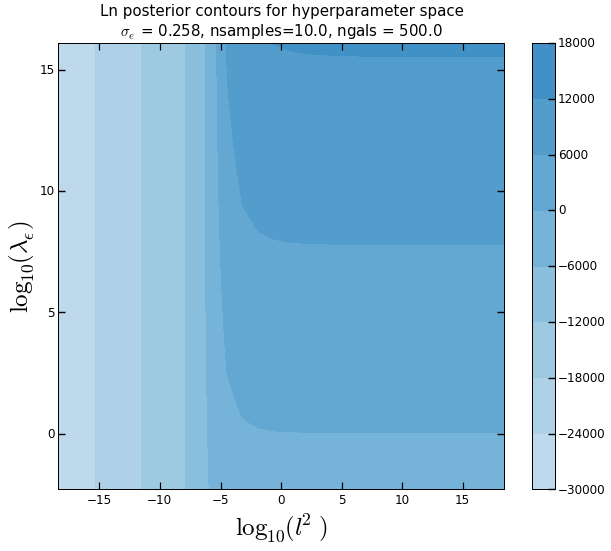

In [87]:
file1 = "/global/cscratch1/sd/karenyng/MagicBeans/outputs/lnp_values_sigma_e_0.258_samples_10.0_ngals_500.0.txt"
sigma_e, nsamples, ngals = get_params(file1)

print (sigma_e, nsamples, ngals)

# %load /global/cscratch1/sd/karenyng/MagicBeans/outputs/lnp_values_sigma_e_0.258_samples_10.0_ngals_500.0.txt
gp_hps = [ 
1.0,1e-08,0.1,1.0,1e-08,0.188739182214,1.0,1e-08,0.356224789026,1.0,1e-08,0.67233575365,1.0,1e-08,1.26896100317,1.0,1e-08,2.39502661999,1.0,1e-08,4.52035365636,1.0,1e-08,8.53167852417,1.0,1e-08,16.1026202756,1.0,1e-08,30.3919538231,1.0,1e-08,57.3615251045,1.0,1e-08,108.263673387,1.0,1e-08,204.335971786,1.0,1e-08,385.662042116,1.0,1e-08,727.895384398,1.0,1e-08,1373.82379588,1.0,1e-08,2592.9437974,1.0,1e-08,4893.90091848,1.0,1e-08,9236.70857187,1.0,1e-08,17433.288222,1.0,1e-08,32903.4456231,1.0,1e-08,62101.6941892,1.0,1e-08,117210.229753,1.0,1e-08,221221.629107,1.0,1e-08,417531.893656,1.0,1e-08,788046.281567,1.0,1e-08,1487352.10729,1.0,1e-08,2807216.20394,1.0,1e-08,5298316.90628,1.0,1e-08,10000000.0,1.0,3.56224789026e-08,0.1,1.0,3.56224789026e-08,0.188739182214,1.0,3.56224789026e-08,0.356224789026,1.0,3.56224789026e-08,0.67233575365,1.0,3.56224789026e-08,1.26896100317,1.0,3.56224789026e-08,2.39502661999,1.0,3.56224789026e-08,4.52035365636,1.0,3.56224789026e-08,8.53167852417,1.0,3.56224789026e-08,16.1026202756,1.0,3.56224789026e-08,30.3919538231,1.0,3.56224789026e-08,57.3615251045,1.0,3.56224789026e-08,108.263673387,1.0,3.56224789026e-08,204.335971786,1.0,3.56224789026e-08,385.662042116,1.0,3.56224789026e-08,727.895384398,1.0,3.56224789026e-08,1373.82379588,1.0,3.56224789026e-08,2592.9437974,1.0,3.56224789026e-08,4893.90091848,1.0,3.56224789026e-08,9236.70857187,1.0,3.56224789026e-08,17433.288222,1.0,3.56224789026e-08,32903.4456231,1.0,3.56224789026e-08,62101.6941892,1.0,3.56224789026e-08,117210.229753,1.0,3.56224789026e-08,221221.629107,1.0,3.56224789026e-08,417531.893656,1.0,3.56224789026e-08,788046.281567,1.0,3.56224789026e-08,1487352.10729,1.0,3.56224789026e-08,2807216.20394,1.0,3.56224789026e-08,5298316.90628,1.0,3.56224789026e-08,10000000.0,1.0,1.26896100317e-07,0.1,1.0,1.26896100317e-07,0.188739182214,1.0,1.26896100317e-07,0.356224789026,1.0,1.26896100317e-07,0.67233575365,1.0,1.26896100317e-07,1.26896100317,1.0,1.26896100317e-07,2.39502661999,1.0,1.26896100317e-07,4.52035365636,1.0,1.26896100317e-07,8.53167852417,1.0,1.26896100317e-07,16.1026202756,1.0,1.26896100317e-07,30.3919538231,1.0,1.26896100317e-07,57.3615251045,1.0,1.26896100317e-07,108.263673387,1.0,1.26896100317e-07,204.335971786,1.0,1.26896100317e-07,385.662042116,1.0,1.26896100317e-07,727.895384398,1.0,1.26896100317e-07,1373.82379588,1.0,1.26896100317e-07,2592.9437974,1.0,1.26896100317e-07,4893.90091848,1.0,1.26896100317e-07,9236.70857187,1.0,1.26896100317e-07,17433.288222,1.0,1.26896100317e-07,32903.4456231,1.0,1.26896100317e-07,62101.6941892,1.0,1.26896100317e-07,117210.229753,1.0,1.26896100317e-07,221221.629107,1.0,1.26896100317e-07,417531.893656,1.0,1.26896100317e-07,788046.281567,1.0,1.26896100317e-07,1487352.10729,1.0,1.26896100317e-07,2807216.20394,1.0,1.26896100317e-07,5298316.90628,1.0,1.26896100317e-07,10000000.0,1.0,4.52035365636e-07,0.1,1.0,4.52035365636e-07,0.188739182214,1.0,4.52035365636e-07,0.356224789026,1.0,4.52035365636e-07,0.67233575365,1.0,4.52035365636e-07,1.26896100317,1.0,4.52035365636e-07,2.39502661999,1.0,4.52035365636e-07,4.52035365636,1.0,4.52035365636e-07,8.53167852417,1.0,4.52035365636e-07,16.1026202756,1.0,4.52035365636e-07,30.3919538231,1.0,4.52035365636e-07,57.3615251045,1.0,4.52035365636e-07,108.263673387,1.0,4.52035365636e-07,204.335971786,1.0,4.52035365636e-07,385.662042116,1.0,4.52035365636e-07,727.895384398,1.0,4.52035365636e-07,1373.82379588,1.0,4.52035365636e-07,2592.9437974,1.0,4.52035365636e-07,4893.90091848,1.0,4.52035365636e-07,9236.70857187,1.0,4.52035365636e-07,17433.288222,1.0,4.52035365636e-07,32903.4456231,1.0,4.52035365636e-07,62101.6941892,1.0,4.52035365636e-07,117210.229753,1.0,4.52035365636e-07,221221.629107,1.0,4.52035365636e-07,417531.893656,1.0,4.52035365636e-07,788046.281567,1.0,4.52035365636e-07,1487352.10729,1.0,4.52035365636e-07,2807216.20394,1.0,4.52035365636e-07,5298316.90628,1.0,4.52035365636e-07,10000000.0,1.0,1.61026202756e-06,0.1,1.0,1.61026202756e-06,0.188739182214,1.0,1.61026202756e-06,0.356224789026,1.0,1.61026202756e-06,0.67233575365,1.0,1.61026202756e-06,1.26896100317,1.0,1.61026202756e-06,2.39502661999,1.0,1.61026202756e-06,4.52035365636,1.0,1.61026202756e-06,8.53167852417,1.0,1.61026202756e-06,16.1026202756,1.0,1.61026202756e-06,30.3919538231,1.0,1.61026202756e-06,57.3615251045,1.0,1.61026202756e-06,108.263673387,1.0,1.61026202756e-06,204.335971786,1.0,1.61026202756e-06,385.662042116,1.0,1.61026202756e-06,727.895384398,1.0,1.61026202756e-06,1373.82379588,1.0,1.61026202756e-06,2592.9437974,1.0,1.61026202756e-06,4893.90091848,1.0,1.61026202756e-06,9236.70857187,1.0,1.61026202756e-06,17433.288222,1.0,1.61026202756e-06,32903.4456231,1.0,1.61026202756e-06,62101.6941892,1.0,1.61026202756e-06,117210.229753,1.0,1.61026202756e-06,221221.629107,1.0,1.61026202756e-06,417531.893656,1.0,1.61026202756e-06,788046.281567,1.0,1.61026202756e-06,1487352.10729,1.0,1.61026202756e-06,2807216.20394,1.0,1.61026202756e-06,5298316.90628,1.0,1.61026202756e-06,10000000.0,1.0,5.73615251045e-06,0.1,1.0,5.73615251045e-06,0.188739182214,1.0,5.73615251045e-06,0.356224789026,1.0,5.73615251045e-06,0.67233575365,1.0,5.73615251045e-06,1.26896100317,1.0,5.73615251045e-06,2.39502661999,1.0,5.73615251045e-06,4.52035365636,1.0,5.73615251045e-06,8.53167852417,1.0,5.73615251045e-06,16.1026202756,1.0,5.73615251045e-06,30.3919538231,1.0,5.73615251045e-06,57.3615251045,1.0,5.73615251045e-06,108.263673387,1.0,5.73615251045e-06,204.335971786,1.0,5.73615251045e-06,385.662042116,1.0,5.73615251045e-06,727.895384398,1.0,5.73615251045e-06,1373.82379588,1.0,5.73615251045e-06,2592.9437974,1.0,5.73615251045e-06,4893.90091848,1.0,5.73615251045e-06,9236.70857187,1.0,5.73615251045e-06,17433.288222,1.0,5.73615251045e-06,32903.4456231,1.0,5.73615251045e-06,62101.6941892,1.0,5.73615251045e-06,117210.229753,1.0,5.73615251045e-06,221221.629107,1.0,5.73615251045e-06,417531.893656,1.0,5.73615251045e-06,788046.281567,1.0,5.73615251045e-06,1487352.10729,1.0,5.73615251045e-06,2807216.20394,1.0,5.73615251045e-06,5298316.90628,1.0,5.73615251045e-06,10000000.0,1.0,2.04335971786e-05,0.1,1.0,2.04335971786e-05,0.188739182214,1.0,2.04335971786e-05,0.356224789026,1.0,2.04335971786e-05,0.67233575365,1.0,2.04335971786e-05,1.26896100317,1.0,2.04335971786e-05,2.39502661999,1.0,2.04335971786e-05,4.52035365636,1.0,2.04335971786e-05,8.53167852417,1.0,2.04335971786e-05,16.1026202756,1.0,2.04335971786e-05,30.3919538231,1.0,2.04335971786e-05,57.3615251045,1.0,2.04335971786e-05,108.263673387,1.0,2.04335971786e-05,204.335971786,1.0,2.04335971786e-05,385.662042116,1.0,2.04335971786e-05,727.895384398,1.0,2.04335971786e-05,1373.82379588,1.0,2.04335971786e-05,2592.9437974,1.0,2.04335971786e-05,4893.90091848,1.0,2.04335971786e-05,9236.70857187,1.0,2.04335971786e-05,17433.288222,1.0,2.04335971786e-05,32903.4456231,1.0,2.04335971786e-05,62101.6941892,1.0,2.04335971786e-05,117210.229753,1.0,2.04335971786e-05,221221.629107,1.0,2.04335971786e-05,417531.893656,1.0,2.04335971786e-05,788046.281567,1.0,2.04335971786e-05,1487352.10729,1.0,2.04335971786e-05,2807216.20394,1.0,2.04335971786e-05,5298316.90628,1.0,2.04335971786e-05,10000000.0,1.0,7.27895384398e-05,0.1,1.0,7.27895384398e-05,0.188739182214,1.0,7.27895384398e-05,0.356224789026,1.0,7.27895384398e-05,0.67233575365,1.0,7.27895384398e-05,1.26896100317,1.0,7.27895384398e-05,2.39502661999,1.0,7.27895384398e-05,4.52035365636,1.0,7.27895384398e-05,8.53167852417,1.0,7.27895384398e-05,16.1026202756,1.0,7.27895384398e-05,30.3919538231,1.0,7.27895384398e-05,57.3615251045,1.0,7.27895384398e-05,108.263673387,1.0,7.27895384398e-05,204.335971786,1.0,7.27895384398e-05,385.662042116,1.0,7.27895384398e-05,727.895384398,1.0,7.27895384398e-05,1373.82379588,1.0,7.27895384398e-05,2592.9437974,1.0,7.27895384398e-05,4893.90091848,1.0,7.27895384398e-05,9236.70857187,1.0,7.27895384398e-05,17433.288222,1.0,7.27895384398e-05,32903.4456231,1.0,7.27895384398e-05,62101.6941892,1.0,7.27895384398e-05,117210.229753,1.0,7.27895384398e-05,221221.629107,1.0,7.27895384398e-05,417531.893656,1.0,7.27895384398e-05,788046.281567,1.0,7.27895384398e-05,1487352.10729,1.0,7.27895384398e-05,2807216.20394,1.0,7.27895384398e-05,5298316.90628,1.0,7.27895384398e-05,10000000.0,1.0,0.00025929437974,0.1,1.0,0.00025929437974,0.188739182214,1.0,0.00025929437974,0.356224789026,1.0,0.00025929437974,0.67233575365,1.0,0.00025929437974,1.26896100317,1.0,0.00025929437974,2.39502661999,1.0,0.00025929437974,4.52035365636,1.0,0.00025929437974,8.53167852417,1.0,0.00025929437974,16.1026202756,1.0,0.00025929437974,30.3919538231,1.0,0.00025929437974,57.3615251045,1.0,0.00025929437974,108.263673387,1.0,0.00025929437974,204.335971786,1.0,0.00025929437974,385.662042116,1.0,0.00025929437974,727.895384398,1.0,0.00025929437974,1373.82379588,1.0,0.00025929437974,2592.9437974,1.0,0.00025929437974,4893.90091848,1.0,0.00025929437974,9236.70857187,1.0,0.00025929437974,17433.288222,1.0,0.00025929437974,32903.4456231,1.0,0.00025929437974,62101.6941892,1.0,0.00025929437974,117210.229753,1.0,0.00025929437974,221221.629107,1.0,0.00025929437974,417531.893656,1.0,0.00025929437974,788046.281567,1.0,0.00025929437974,1487352.10729,1.0,0.00025929437974,2807216.20394,1.0,0.00025929437974,5298316.90628,1.0,0.00025929437974,10000000.0,1.0,0.000923670857187,0.1,1.0,0.000923670857187,0.188739182214,1.0,0.000923670857187,0.356224789026,1.0,0.000923670857187,0.67233575365,1.0,0.000923670857187,1.26896100317,1.0,0.000923670857187,2.39502661999,1.0,0.000923670857187,4.52035365636,1.0,0.000923670857187,8.53167852417,1.0,0.000923670857187,16.1026202756,1.0,0.000923670857187,30.3919538231,1.0,0.000923670857187,57.3615251045,1.0,0.000923670857187,108.263673387,1.0,0.000923670857187,204.335971786,1.0,0.000923670857187,385.662042116,1.0,0.000923670857187,727.895384398,1.0,0.000923670857187,1373.82379588,1.0,0.000923670857187,2592.9437974,1.0,0.000923670857187,4893.90091848,1.0,0.000923670857187,9236.70857187,1.0,0.000923670857187,17433.288222,1.0,0.000923670857187,32903.4456231,1.0,0.000923670857187,62101.6941892,1.0,0.000923670857187,117210.229753,1.0,0.000923670857187,221221.629107,1.0,0.000923670857187,417531.893656,1.0,0.000923670857187,788046.281567,1.0,0.000923670857187,1487352.10729,1.0,0.000923670857187,2807216.20394,1.0,0.000923670857187,5298316.90628,1.0,0.000923670857187,10000000.0,1.0,0.00329034456231,0.1,1.0,0.00329034456231,0.188739182214,1.0,0.00329034456231,0.356224789026,1.0,0.00329034456231,0.67233575365,1.0,0.00329034456231,1.26896100317,1.0,0.00329034456231,2.39502661999,1.0,0.00329034456231,4.52035365636,1.0,0.00329034456231,8.53167852417,1.0,0.00329034456231,16.1026202756,1.0,0.00329034456231,30.3919538231,1.0,0.00329034456231,57.3615251045,1.0,0.00329034456231,108.263673387,1.0,0.00329034456231,204.335971786,1.0,0.00329034456231,385.662042116,1.0,0.00329034456231,727.895384398,1.0,0.00329034456231,1373.82379588,1.0,0.00329034456231,2592.9437974,1.0,0.00329034456231,4893.90091848,1.0,0.00329034456231,9236.70857187,1.0,0.00329034456231,17433.288222,1.0,0.00329034456231,32903.4456231,1.0,0.00329034456231,62101.6941892,1.0,0.00329034456231,117210.229753,1.0,0.00329034456231,221221.629107,1.0,0.00329034456231,417531.893656,1.0,0.00329034456231,788046.281567,1.0,0.00329034456231,1487352.10729,1.0,0.00329034456231,2807216.20394,1.0,0.00329034456231,5298316.90628,1.0,0.00329034456231,10000000.0,1.0,0.0117210229753,0.1,1.0,0.0117210229753,0.188739182214,1.0,0.0117210229753,0.356224789026,1.0,0.0117210229753,0.67233575365,1.0,0.0117210229753,1.26896100317,1.0,0.0117210229753,2.39502661999,1.0,0.0117210229753,4.52035365636,1.0,0.0117210229753,8.53167852417,1.0,0.0117210229753,16.1026202756,1.0,0.0117210229753,30.3919538231,1.0,0.0117210229753,57.3615251045,1.0,0.0117210229753,108.263673387,1.0,0.0117210229753,204.335971786,1.0,0.0117210229753,385.662042116,1.0,0.0117210229753,727.895384398,1.0,0.0117210229753,1373.82379588,1.0,0.0117210229753,2592.9437974,1.0,0.0117210229753,4893.90091848,1.0,0.0117210229753,9236.70857187,1.0,0.0117210229753,17433.288222,1.0,0.0117210229753,32903.4456231,1.0,0.0117210229753,62101.6941892,1.0,0.0117210229753,117210.229753,1.0,0.0117210229753,221221.629107,1.0,0.0117210229753,417531.893656,1.0,0.0117210229753,788046.281567,1.0,0.0117210229753,1487352.10729,1.0,0.0117210229753,2807216.20394,1.0,0.0117210229753,5298316.90628,1.0,0.0117210229753,10000000.0,1.0,0.0417531893656,0.1,1.0,0.0417531893656,0.188739182214,1.0,0.0417531893656,0.356224789026,1.0,0.0417531893656,0.67233575365,1.0,0.0417531893656,1.26896100317,1.0,0.0417531893656,2.39502661999,1.0,0.0417531893656,4.52035365636,1.0,0.0417531893656,8.53167852417,1.0,0.0417531893656,16.1026202756,1.0,0.0417531893656,30.3919538231,1.0,0.0417531893656,57.3615251045,1.0,0.0417531893656,108.263673387,1.0,0.0417531893656,204.335971786,1.0,0.0417531893656,385.662042116,1.0,0.0417531893656,727.895384398,1.0,0.0417531893656,1373.82379588,1.0,0.0417531893656,2592.9437974,1.0,0.0417531893656,4893.90091848,1.0,0.0417531893656,9236.70857187,1.0,0.0417531893656,17433.288222,1.0,0.0417531893656,32903.4456231,1.0,0.0417531893656,62101.6941892,1.0,0.0417531893656,117210.229753,1.0,0.0417531893656,221221.629107,1.0,0.0417531893656,417531.893656,1.0,0.0417531893656,788046.281567,1.0,0.0417531893656,1487352.10729,1.0,0.0417531893656,2807216.20394,1.0,0.0417531893656,5298316.90628,1.0,0.0417531893656,10000000.0,1.0,0.148735210729,0.1,1.0,0.148735210729,0.188739182214,1.0,0.148735210729,0.356224789026,1.0,0.148735210729,0.67233575365,1.0,0.148735210729,1.26896100317,1.0,0.148735210729,2.39502661999,1.0,0.148735210729,4.52035365636,1.0,0.148735210729,8.53167852417,1.0,0.148735210729,16.1026202756,1.0,0.148735210729,30.3919538231,1.0,0.148735210729,57.3615251045,1.0,0.148735210729,108.263673387,1.0,0.148735210729,204.335971786,1.0,0.148735210729,385.662042116,1.0,0.148735210729,727.895384398,1.0,0.148735210729,1373.82379588,1.0,0.148735210729,2592.9437974,1.0,0.148735210729,4893.90091848,1.0,0.148735210729,9236.70857187,1.0,0.148735210729,17433.288222,1.0,0.148735210729,32903.4456231,1.0,0.148735210729,62101.6941892,1.0,0.148735210729,117210.229753,1.0,0.148735210729,221221.629107,1.0,0.148735210729,417531.893656,1.0,0.148735210729,788046.281567,1.0,0.148735210729,1487352.10729,1.0,0.148735210729,2807216.20394,1.0,0.148735210729,5298316.90628,1.0,0.148735210729,10000000.0,1.0,0.529831690628,0.1,1.0,0.529831690628,0.188739182214,1.0,0.529831690628,0.356224789026,1.0,0.529831690628,0.67233575365,1.0,0.529831690628,1.26896100317,1.0,0.529831690628,2.39502661999,1.0,0.529831690628,4.52035365636,1.0,0.529831690628,8.53167852417,1.0,0.529831690628,16.1026202756,1.0,0.529831690628,30.3919538231,1.0,0.529831690628,57.3615251045,1.0,0.529831690628,108.263673387,1.0,0.529831690628,204.335971786,1.0,0.529831690628,385.662042116,1.0,0.529831690628,727.895384398,1.0,0.529831690628,1373.82379588,1.0,0.529831690628,2592.9437974,1.0,0.529831690628,4893.90091848,1.0,0.529831690628,9236.70857187,1.0,0.529831690628,17433.288222,1.0,0.529831690628,32903.4456231,1.0,0.529831690628,62101.6941892,1.0,0.529831690628,117210.229753,1.0,0.529831690628,221221.629107,1.0,0.529831690628,417531.893656,1.0,0.529831690628,788046.281567,1.0,0.529831690628,1487352.10729,1.0,0.529831690628,2807216.20394,1.0,0.529831690628,5298316.90628,1.0,0.529831690628,10000000.0,1.0,1.88739182214,0.1,1.0,1.88739182214,0.188739182214,1.0,1.88739182214,0.356224789026,1.0,1.88739182214,0.67233575365,1.0,1.88739182214,1.26896100317,1.0,1.88739182214,2.39502661999,1.0,1.88739182214,4.52035365636,1.0,1.88739182214,8.53167852417,1.0,1.88739182214,16.1026202756,1.0,1.88739182214,30.3919538231,1.0,1.88739182214,57.3615251045,1.0,1.88739182214,108.263673387,1.0,1.88739182214,204.335971786,1.0,1.88739182214,385.662042116,1.0,1.88739182214,727.895384398,1.0,1.88739182214,1373.82379588,1.0,1.88739182214,2592.9437974,1.0,1.88739182214,4893.90091848,1.0,1.88739182214,9236.70857187,1.0,1.88739182214,17433.288222,1.0,1.88739182214,32903.4456231,1.0,1.88739182214,62101.6941892,1.0,1.88739182214,117210.229753,1.0,1.88739182214,221221.629107,1.0,1.88739182214,417531.893656,1.0,1.88739182214,788046.281567,1.0,1.88739182214,1487352.10729,1.0,1.88739182214,2807216.20394,1.0,1.88739182214,5298316.90628,1.0,1.88739182214,10000000.0,1.0,6.7233575365,0.1,1.0,6.7233575365,0.188739182214,1.0,6.7233575365,0.356224789026,1.0,6.7233575365,0.67233575365,1.0,6.7233575365,1.26896100317,1.0,6.7233575365,2.39502661999,1.0,6.7233575365,4.52035365636,1.0,6.7233575365,8.53167852417,1.0,6.7233575365,16.1026202756,1.0,6.7233575365,30.3919538231,1.0,6.7233575365,57.3615251045,1.0,6.7233575365,108.263673387,1.0,6.7233575365,204.335971786,1.0,6.7233575365,385.662042116,1.0,6.7233575365,727.895384398,1.0,6.7233575365,1373.82379588,1.0,6.7233575365,2592.9437974,1.0,6.7233575365,4893.90091848,1.0,6.7233575365,9236.70857187,1.0,6.7233575365,17433.288222,1.0,6.7233575365,32903.4456231,1.0,6.7233575365,62101.6941892,1.0,6.7233575365,117210.229753,1.0,6.7233575365,221221.629107,1.0,6.7233575365,417531.893656,1.0,6.7233575365,788046.281567,1.0,6.7233575365,1487352.10729,1.0,6.7233575365,2807216.20394,1.0,6.7233575365,5298316.90628,1.0,6.7233575365,10000000.0,1.0,23.9502661999,0.1,1.0,23.9502661999,0.188739182214,1.0,23.9502661999,0.356224789026,1.0,23.9502661999,0.67233575365,1.0,23.9502661999,1.26896100317,1.0,23.9502661999,2.39502661999,1.0,23.9502661999,4.52035365636,1.0,23.9502661999,8.53167852417,1.0,23.9502661999,16.1026202756,1.0,23.9502661999,30.3919538231,1.0,23.9502661999,57.3615251045,1.0,23.9502661999,108.263673387,1.0,23.9502661999,204.335971786,1.0,23.9502661999,385.662042116,1.0,23.9502661999,727.895384398,1.0,23.9502661999,1373.82379588,1.0,23.9502661999,2592.9437974,1.0,23.9502661999,4893.90091848,1.0,23.9502661999,9236.70857187,1.0,23.9502661999,17433.288222,1.0,23.9502661999,32903.4456231,1.0,23.9502661999,62101.6941892,1.0,23.9502661999,117210.229753,1.0,23.9502661999,221221.629107,1.0,23.9502661999,417531.893656,1.0,23.9502661999,788046.281567,1.0,23.9502661999,1487352.10729,1.0,23.9502661999,2807216.20394,1.0,23.9502661999,5298316.90628,1.0,23.9502661999,10000000.0,1.0,85.3167852417,0.1,1.0,85.3167852417,0.188739182214,1.0,85.3167852417,0.356224789026,1.0,85.3167852417,0.67233575365,1.0,85.3167852417,1.26896100317,1.0,85.3167852417,2.39502661999,1.0,85.3167852417,4.52035365636,1.0,85.3167852417,8.53167852417,1.0,85.3167852417,16.1026202756,1.0,85.3167852417,30.3919538231,1.0,85.3167852417,57.3615251045,1.0,85.3167852417,108.263673387,1.0,85.3167852417,204.335971786,1.0,85.3167852417,385.662042116,1.0,85.3167852417,727.895384398,1.0,85.3167852417,1373.82379588,1.0,85.3167852417,2592.9437974,1.0,85.3167852417,4893.90091848,1.0,85.3167852417,9236.70857187,1.0,85.3167852417,17433.288222,1.0,85.3167852417,32903.4456231,1.0,85.3167852417,62101.6941892,1.0,85.3167852417,117210.229753,1.0,85.3167852417,221221.629107,1.0,85.3167852417,417531.893656,1.0,85.3167852417,788046.281567,1.0,85.3167852417,1487352.10729,1.0,85.3167852417,2807216.20394,1.0,85.3167852417,5298316.90628,1.0,85.3167852417,10000000.0,1.0,303.919538231,0.1,1.0,303.919538231,0.188739182214,1.0,303.919538231,0.356224789026,1.0,303.919538231,0.67233575365,1.0,303.919538231,1.26896100317,1.0,303.919538231,2.39502661999,1.0,303.919538231,4.52035365636,1.0,303.919538231,8.53167852417,1.0,303.919538231,16.1026202756,1.0,303.919538231,30.3919538231,1.0,303.919538231,57.3615251045,1.0,303.919538231,108.263673387,1.0,303.919538231,204.335971786,1.0,303.919538231,385.662042116,1.0,303.919538231,727.895384398,1.0,303.919538231,1373.82379588,1.0,303.919538231,2592.9437974,1.0,303.919538231,4893.90091848,1.0,303.919538231,9236.70857187,1.0,303.919538231,17433.288222,1.0,303.919538231,32903.4456231,1.0,303.919538231,62101.6941892,1.0,303.919538231,117210.229753,1.0,303.919538231,221221.629107,1.0,303.919538231,417531.893656,1.0,303.919538231,788046.281567,1.0,303.919538231,1487352.10729,1.0,303.919538231,2807216.20394,1.0,303.919538231,5298316.90628,1.0,303.919538231,10000000.0,1.0,1082.63673387,0.1,1.0,1082.63673387,0.188739182214,1.0,1082.63673387,0.356224789026,1.0,1082.63673387,0.67233575365,1.0,1082.63673387,1.26896100317,1.0,1082.63673387,2.39502661999,1.0,1082.63673387,4.52035365636,1.0,1082.63673387,8.53167852417,1.0,1082.63673387,16.1026202756,1.0,1082.63673387,30.3919538231,1.0,1082.63673387,57.3615251045,1.0,1082.63673387,108.263673387,1.0,1082.63673387,204.335971786,1.0,1082.63673387,385.662042116,1.0,1082.63673387,727.895384398,1.0,1082.63673387,1373.82379588,1.0,1082.63673387,2592.9437974,1.0,1082.63673387,4893.90091848,1.0,1082.63673387,9236.70857187,1.0,1082.63673387,17433.288222,1.0,1082.63673387,32903.4456231,1.0,1082.63673387,62101.6941892,1.0,1082.63673387,117210.229753,1.0,1082.63673387,221221.629107,1.0,1082.63673387,417531.893656,1.0,1082.63673387,788046.281567,1.0,1082.63673387,1487352.10729,1.0,1082.63673387,2807216.20394,1.0,1082.63673387,5298316.90628,1.0,1082.63673387,10000000.0,1.0,3856.62042116,0.1,1.0,3856.62042116,0.188739182214,1.0,3856.62042116,0.356224789026,1.0,3856.62042116,0.67233575365,1.0,3856.62042116,1.26896100317,1.0,3856.62042116,2.39502661999,1.0,3856.62042116,4.52035365636,1.0,3856.62042116,8.53167852417,1.0,3856.62042116,16.1026202756,1.0,3856.62042116,30.3919538231,1.0,3856.62042116,57.3615251045,1.0,3856.62042116,108.263673387,1.0,3856.62042116,204.335971786,1.0,3856.62042116,385.662042116,1.0,3856.62042116,727.895384398,1.0,3856.62042116,1373.82379588,1.0,3856.62042116,2592.9437974,1.0,3856.62042116,4893.90091848,1.0,3856.62042116,9236.70857187,1.0,3856.62042116,17433.288222,1.0,3856.62042116,32903.4456231,1.0,3856.62042116,62101.6941892,1.0,3856.62042116,117210.229753,1.0,3856.62042116,221221.629107,1.0,3856.62042116,417531.893656,1.0,3856.62042116,788046.281567,1.0,3856.62042116,1487352.10729,1.0,3856.62042116,2807216.20394,1.0,3856.62042116,5298316.90628,1.0,3856.62042116,10000000.0,1.0,13738.2379588,0.1,1.0,13738.2379588,0.188739182214,1.0,13738.2379588,0.356224789026,1.0,13738.2379588,0.67233575365,1.0,13738.2379588,1.26896100317,1.0,13738.2379588,2.39502661999,1.0,13738.2379588,4.52035365636,1.0,13738.2379588,8.53167852417,1.0,13738.2379588,16.1026202756,1.0,13738.2379588,30.3919538231,1.0,13738.2379588,57.3615251045,1.0,13738.2379588,108.263673387,1.0,13738.2379588,204.335971786,1.0,13738.2379588,385.662042116,1.0,13738.2379588,727.895384398,1.0,13738.2379588,1373.82379588,1.0,13738.2379588,2592.9437974,1.0,13738.2379588,4893.90091848,1.0,13738.2379588,9236.70857187,1.0,13738.2379588,17433.288222,1.0,13738.2379588,32903.4456231,1.0,13738.2379588,62101.6941892,1.0,13738.2379588,117210.229753,1.0,13738.2379588,221221.629107,1.0,13738.2379588,417531.893656,1.0,13738.2379588,788046.281567,1.0,13738.2379588,1487352.10729,1.0,13738.2379588,2807216.20394,1.0,13738.2379588,5298316.90628,1.0,13738.2379588,10000000.0,1.0,48939.0091848,0.1,1.0,48939.0091848,0.188739182214,1.0,48939.0091848,0.356224789026,1.0,48939.0091848,0.67233575365,1.0,48939.0091848,1.26896100317,1.0,48939.0091848,2.39502661999,1.0,48939.0091848,4.52035365636,1.0,48939.0091848,8.53167852417,1.0,48939.0091848,16.1026202756,1.0,48939.0091848,30.3919538231,1.0,48939.0091848,57.3615251045,1.0,48939.0091848,108.263673387,1.0,48939.0091848,204.335971786,1.0,48939.0091848,385.662042116,1.0,48939.0091848,727.895384398,1.0,48939.0091848,1373.82379588,1.0,48939.0091848,2592.9437974,1.0,48939.0091848,4893.90091848,1.0,48939.0091848,9236.70857187,1.0,48939.0091848,17433.288222,1.0,48939.0091848,32903.4456231,1.0,48939.0091848,62101.6941892,1.0,48939.0091848,117210.229753,1.0,48939.0091848,221221.629107,1.0,48939.0091848,417531.893656,1.0,48939.0091848,788046.281567,1.0,48939.0091848,1487352.10729,1.0,48939.0091848,2807216.20394,1.0,48939.0091848,5298316.90628,1.0,48939.0091848,10000000.0,1.0,174332.88222,0.1,1.0,174332.88222,0.188739182214,1.0,174332.88222,0.356224789026,1.0,174332.88222,0.67233575365,1.0,174332.88222,1.26896100317,1.0,174332.88222,2.39502661999,1.0,174332.88222,4.52035365636,1.0,174332.88222,8.53167852417,1.0,174332.88222,16.1026202756,1.0,174332.88222,30.3919538231,1.0,174332.88222,57.3615251045,1.0,174332.88222,108.263673387,1.0,174332.88222,204.335971786,1.0,174332.88222,385.662042116,1.0,174332.88222,727.895384398,1.0,174332.88222,1373.82379588,1.0,174332.88222,2592.9437974,1.0,174332.88222,4893.90091848,1.0,174332.88222,9236.70857187,1.0,174332.88222,17433.288222,1.0,174332.88222,32903.4456231,1.0,174332.88222,62101.6941892,1.0,174332.88222,117210.229753,1.0,174332.88222,221221.629107,1.0,174332.88222,417531.893656,1.0,174332.88222,788046.281567,1.0,174332.88222,1487352.10729,1.0,174332.88222,2807216.20394,1.0,174332.88222,5298316.90628,1.0,174332.88222,10000000.0,1.0,621016.941892,0.1,1.0,621016.941892,0.188739182214,1.0,621016.941892,0.356224789026,1.0,621016.941892,0.67233575365,1.0,621016.941892,1.26896100317,1.0,621016.941892,2.39502661999,1.0,621016.941892,4.52035365636,1.0,621016.941892,8.53167852417,1.0,621016.941892,16.1026202756,1.0,621016.941892,30.3919538231,1.0,621016.941892,57.3615251045,1.0,621016.941892,108.263673387,1.0,621016.941892,204.335971786,1.0,621016.941892,385.662042116,1.0,621016.941892,727.895384398,1.0,621016.941892,1373.82379588,1.0,621016.941892,2592.9437974,1.0,621016.941892,4893.90091848,1.0,621016.941892,9236.70857187,1.0,621016.941892,17433.288222,1.0,621016.941892,32903.4456231,1.0,621016.941892,62101.6941892,1.0,621016.941892,117210.229753,1.0,621016.941892,221221.629107,1.0,621016.941892,417531.893656,1.0,621016.941892,788046.281567,1.0,621016.941892,1487352.10729,1.0,621016.941892,2807216.20394,1.0,621016.941892,5298316.90628,1.0,621016.941892,10000000.0,1.0,2212216.29107,0.1,1.0,2212216.29107,0.188739182214,1.0,2212216.29107,0.356224789026,1.0,2212216.29107,0.67233575365,1.0,2212216.29107,1.26896100317,1.0,2212216.29107,2.39502661999,1.0,2212216.29107,4.52035365636,1.0,2212216.29107,8.53167852417,1.0,2212216.29107,16.1026202756,1.0,2212216.29107,30.3919538231,1.0,2212216.29107,57.3615251045,1.0,2212216.29107,108.263673387,1.0,2212216.29107,204.335971786,1.0,2212216.29107,385.662042116,1.0,2212216.29107,727.895384398,1.0,2212216.29107,1373.82379588,1.0,2212216.29107,2592.9437974,1.0,2212216.29107,4893.90091848,1.0,2212216.29107,9236.70857187,1.0,2212216.29107,17433.288222,1.0,2212216.29107,32903.4456231,1.0,2212216.29107,62101.6941892,1.0,2212216.29107,117210.229753,1.0,2212216.29107,221221.629107,1.0,2212216.29107,417531.893656,1.0,2212216.29107,788046.281567,1.0,2212216.29107,1487352.10729,1.0,2212216.29107,2807216.20394,1.0,2212216.29107,5298316.90628,1.0,2212216.29107,10000000.0,1.0,7880462.81567,0.1,1.0,7880462.81567,0.188739182214,1.0,7880462.81567,0.356224789026,1.0,7880462.81567,0.67233575365,1.0,7880462.81567,1.26896100317,1.0,7880462.81567,2.39502661999,1.0,7880462.81567,4.52035365636,1.0,7880462.81567,8.53167852417,1.0,7880462.81567,16.1026202756,1.0,7880462.81567,30.3919538231,1.0,7880462.81567,57.3615251045,1.0,7880462.81567,108.263673387,1.0,7880462.81567,204.335971786,1.0,7880462.81567,385.662042116,1.0,7880462.81567,727.895384398,1.0,7880462.81567,1373.82379588,1.0,7880462.81567,2592.9437974,1.0,7880462.81567,4893.90091848,1.0,7880462.81567,9236.70857187,1.0,7880462.81567,17433.288222,1.0,7880462.81567,32903.4456231,1.0,7880462.81567,62101.6941892,1.0,7880462.81567,117210.229753,1.0,7880462.81567,221221.629107,1.0,7880462.81567,417531.893656,1.0,7880462.81567,788046.281567,1.0,7880462.81567,1487352.10729,1.0,7880462.81567,2807216.20394,1.0,7880462.81567,5298316.90628,1.0,7880462.81567,10000000.0,1.0,28072162.0394,0.1,1.0,28072162.0394,0.188739182214,1.0,28072162.0394,0.356224789026,1.0,28072162.0394,0.67233575365,1.0,28072162.0394,1.26896100317,1.0,28072162.0394,2.39502661999,1.0,28072162.0394,4.52035365636,1.0,28072162.0394,8.53167852417,1.0,28072162.0394,16.1026202756,1.0,28072162.0394,30.3919538231,1.0,28072162.0394,57.3615251045,1.0,28072162.0394,108.263673387,1.0,28072162.0394,204.335971786,1.0,28072162.0394,385.662042116,1.0,28072162.0394,727.895384398,1.0,28072162.0394,1373.82379588,1.0,28072162.0394,2592.9437974,1.0,28072162.0394,4893.90091848,1.0,28072162.0394,9236.70857187,1.0,28072162.0394,17433.288222,1.0,28072162.0394,32903.4456231,1.0,28072162.0394,62101.6941892,1.0,28072162.0394,117210.229753,1.0,28072162.0394,221221.629107,1.0,28072162.0394,417531.893656,1.0,28072162.0394,788046.281567,1.0,28072162.0394,1487352.10729,1.0,28072162.0394,2807216.20394,1.0,28072162.0394,5298316.90628,1.0,28072162.0394,10000000.0,1.0,100000000.0,0.1,1.0,100000000.0,0.188739182214,1.0,100000000.0,0.356224789026,1.0,100000000.0,0.67233575365,1.0,100000000.0,1.26896100317,1.0,100000000.0,2.39502661999,1.0,100000000.0,4.52035365636,1.0,100000000.0,8.53167852417,1.0,100000000.0,16.1026202756,1.0,100000000.0,30.3919538231,1.0,100000000.0,57.3615251045,1.0,100000000.0,108.263673387,1.0,100000000.0,204.335971786,1.0,100000000.0,385.662042116,1.0,100000000.0,727.895384398,1.0,100000000.0,1373.82379588,1.0,100000000.0,2592.9437974,1.0,100000000.0,4893.90091848,1.0,100000000.0,9236.70857187,1.0,100000000.0,17433.288222,1.0,100000000.0,32903.4456231,1.0,100000000.0,62101.6941892,1.0,100000000.0,117210.229753,1.0,100000000.0,221221.629107,1.0,100000000.0,417531.893656,1.0,100000000.0,788046.281567,1.0,100000000.0,1487352.10729,1.0,100000000.0,2807216.20394,1.0,100000000.0,5298316.90628,1.0,100000000.0,10000000.0
]

ln_posteriors = [ 
-28735.3,-28735.3,-28735.3,-28735.3,-28735.3,-28735.3,-28735.3,-28735.3,-28735.3,-28735.3,-28735.3,-28735.3,-28735.3,-28735.3,-28735.3,-28735.3,-28735.3,-28735.3,-28735.3,-28735.3,-28735.3,-28735.3,-28735.3,-28735.3,-28735.3,-28735.3,-28735.3,-28735.3,-28735.3,-28735.3,-26768.7,-26768.7,-26768.7,-26768.7,-26768.7,-26768.7,-26768.7,-26768.7,-26768.7,-26768.7,-26768.7,-26768.7,-26768.7,-26768.7,-26768.7,-26768.7,-26768.7,-26768.7,-26768.7,-26768.7,-26768.7,-26768.7,-26768.7,-26768.7,-26768.7,-26768.7,-26768.7,-26768.7,-26768.7,-26768.7,-24802.2,-24802.2,-24802.2,-24802.2,-24802.2,-24802.2,-24802.2,-24802.2,-24802.2,-24802.2,-24802.2,-24802.2,-24802.2,-24802.2,-24802.2,-24802.2,-24802.2,-24802.2,-24802.2,-24802.2,-24802.2,-24802.2,-24802.2,-24802.2,-24802.2,-24802.2,-24802.2,-24802.2,-24802.2,-24802.2,-22835.6,-22835.6,-22835.6,-22835.6,-22835.6,-22835.6,-22835.6,-22835.6,-22835.6,-22835.6,-22835.6,-22835.6,-22835.6,-22835.6,-22835.6,-22835.6,-22835.6,-22835.6,-22835.6,-22835.6,-22835.6,-22835.6,-22835.6,-22835.6,-22835.6,-22835.6,-22835.6,-22835.6,-22835.6,-22835.6,-20868.7,-20868.7,-20868.7,-20868.7,-20868.7,-20868.7,-20868.7,-20868.7,-20868.7,-20868.7,-20868.7,-20868.7,-20868.7,-20868.7,-20868.7,-20868.7,-20868.7,-20868.7,-20868.7,-20868.7,-20868.7,-20868.7,-20868.7,-20868.7,-20868.7,-20868.7,-20868.7,-20868.7,-20868.7,-20868.7,-18899.0,-18899.0,-18899.0,-18899.0,-18899.0,-18899.0,-18899.0,-18899.0,-18899.0,-18899.0,-18899.0,-18899.0,-18899.0,-18899.0,-18899.0,-18899.0,-18899.0,-18899.0,-18899.0,-18899.0,-18899.0,-18899.0,-18899.0,-18899.0,-18899.0,-18899.0,-18899.0,-18899.0,-18899.0,-18899.0,-16920.7,-16920.7,-16920.7,-16920.7,-16920.7,-16920.7,-16920.7,-16920.7,-16920.7,-16920.7,-16920.7,-16920.7,-16920.7,-16920.7,-16920.7,-16920.7,-16920.7,-16920.7,-16920.7,-16920.7,-16920.7,-16920.7,-16920.7,-16920.7,-16920.7,-16920.7,-16920.7,-16920.7,-16920.7,-16920.7,-14909.6,-14909.6,-14909.6,-14909.6,-14909.6,-14909.6,-14909.6,-14909.6,-14909.6,-14909.6,-14909.6,-14909.6,-14909.6,-14909.6,-14909.6,-14909.6,-14909.6,-14909.6,-14909.6,-14909.6,-14909.6,-14909.6,-14909.6,-14909.6,-14909.6,-14909.6,-14909.6,-14909.6,-14909.6,-14909.6,-12758.1,-12758.1,-12758.1,-12758.1,-12758.1,-12758.1,-12758.1,-12758.1,-12758.1,-12758.1,-12758.1,-12758.1,-12758.1,-12758.1,-12758.1,-12758.1,-12758.1,-12758.1,-12758.1,-12758.1,-12758.1,-12758.1,-12758.1,-12758.1,-12758.1,-12758.1,-12758.1,-12758.1,-12758.1,-12758.1,-9892.72,-9891.44,-9890.55,-9889.93,-9889.5,-9889.22,-9889.04,-9888.94,-9888.87,-9888.84,-9888.82,-9888.81,-9888.81,-9888.8,-9888.8,-9888.8,-9888.8,-9888.8,-9888.8,-9888.8,-9888.8,-9888.8,-9888.8,-9888.8,-9888.8,-9888.8,-9888.8,-9888.8,-9888.8,-9888.8,-5165.79,-4978.78,-4802.45,-4636.53,-4480.78,-4334.91,-4198.65,-4071.72,-3953.82,-3844.62,-3743.81,-3651.03,-3565.98,-3488.35,-3417.85,-3354.19,-3297.09,-3246.26,-3201.38,-3162.1,-3128.04,-3098.79,-3073.94,-3053.04,-3035.66,-3021.36,-3009.72,-3000.35,-2992.89,-2987.04,-2785.44,-2397.36,-2013.96,-1635.22,-1261.12,-891.668,-526.838,-166.625,188.975,539.968,886.357,1228.14,1565.31,1897.86,2225.78,2549.06,2867.72,3181.74,3491.14,3795.94,4096.11,4391.68,4682.62,4968.95,5250.66,5527.78,5800.32,6068.3,6331.73,6590.61,-2096.4,-1640.23,-1186.08,-733.948,-283.82,164.302,610.424,1054.55,1496.67,1936.79,2374.91,2811.0,3245.07,3677.11,4107.11,4535.07,4960.97,5384.81,5806.59,6226.3,6643.93,7059.46,7472.91,7884.25,8293.47,8700.58,9105.55,9508.38,9909.05,10307.6,-1903.3,-1424.57,-946.806,-470.013,5.80846,480.655,954.524,1427.41,1899.32,2370.24,2840.18,3309.12,3777.06,4243.97,4709.87,5174.75,5638.59,6101.4,6563.19,7023.93,7483.63,7942.26,8399.83,8856.32,9311.73,9766.05,10219.3,10671.4,11122.4,11572.3,-1847.48,-1360.92,-874.857,-389.292,95.7684,580.314,1064.34,1547.82,2030.77,2513.17,2995.04,3476.36,3957.12,4437.32,4916.96,5396.04,5874.55,6352.47,6829.79,7306.52,7782.66,8258.22,8733.16,9207.48,9681.18,10154.3,10626.7,11098.6,11569.8,12040.4,-1830.41,-1340.83,-851.522,-362.501,126.21,614.596,1102.66,1590.42,2077.85,2564.95,3051.69,3538.1,4024.19,4509.99,4995.46,5480.6,5965.37,6449.78,6933.83,7417.52,7900.85,8383.8,8866.35,9348.51,9830.3,10311.7,10792.8,11273.4,11753.7,12233.5,-1824.9,-1334.0,-843.3,-352.823,137.429,627.454,1117.27,1606.9,2096.37,2585.68,3074.81,3563.72,4052.38,4540.76,5028.91,5516.85,6004.59,6492.13,6979.41,7466.41,7953.11,8439.54,8925.72,9411.72,9897.52,10383.1,10868.5,11353.5,11838.3,12322.7,-1823.62,-1332.12,-840.701,-349.411,141.728,632.706,1123.53,1614.22,2104.76,2595.14,3085.33,3575.32,4065.13,4554.79,5044.32,5533.77,6023.12,6512.36,7001.45,7490.33,7978.97,8467.37,8955.55,9443.56,9931.45,10419.2,10906.9,11394.3,11881.6,12368.6,-1823.47,-1331.84,-840.221,-348.622,142.943,634.45,1125.87,1617.16,2108.31,2599.32,3090.19,3580.97,4071.65,4562.25,5052.74,5543.09,6033.26,6523.24,7013.05,7502.72,7992.27,8481.76,8971.19,9460.57,9949.89,10439.1,10928.2,11417.1,11905.7,12394.1,-1823.46,-1331.82,-840.176,-348.537,143.098,634.727,1126.35,1617.94,2109.51,2601.02,3092.44,3583.73,4074.89,4565.9,5056.79,5547.59,6038.33,6529.01,7019.65,7510.22,8000.69,8491.03,8981.2,9471.18,9960.99,10450.7,10940.2,11429.7,11919.2,12408.6,-1823.45,-1331.81,-840.172,-348.531,143.111,634.751,1126.39,1618.03,2109.66,2601.29,3092.91,3584.51,4076.08,4567.58,5059.0,5550.3,6041.45,6532.47,7023.36,7514.17,8004.92,8495.64,8986.33,9476.99,9967.61,10458.2,10948.6,11439.0,11929.1,12419.1,-1823.45,-1331.81,-840.172,-348.53,143.112,634.753,1126.39,1618.04,2109.68,2601.32,3092.96,3584.6,4076.23,4567.86,5059.48,5551.08,6042.64,6534.15,7025.57,7516.87,8008.02,8499.04,8989.93,9480.74,9971.5,10462.2,10952.9,11443.6,11934.3,12424.9,-1823.45,-1331.81,-840.172,-348.53,143.112,634.753,1126.39,1618.04,2109.68,2601.32,3092.96,3584.6,4076.24,4567.88,5059.52,5551.16,6042.8,6534.43,7026.04,7517.64,8009.21,8500.72,8992.14,9483.43,9974.59,10465.6,10956.5,11447.3,11938.1,12428.8,-1823.45,-1331.81,-840.172,-348.53,143.112,634.753,1126.39,1618.04,2109.68,2601.32,3092.96,3584.6,4076.24,4567.89,5059.53,5551.17,6042.81,6534.45,7026.09,7517.73,8009.36,8500.99,8992.61,9484.21,9975.78,10467.3,10958.7,11450.0,11941.2,12432.2,-1823.45,-1331.81,-840.172,-348.53,143.112,634.753,1126.39,1618.04,2109.68,2601.32,3092.96,3584.6,4076.24,4567.89,5059.53,5551.17,6042.81,6534.45,7026.09,7517.74,8009.38,8501.02,8992.66,9484.29,9975.93,10467.6,10959.2,11450.8,11942.3,12433.8,-1823.45,-1331.81,-840.172,-348.53,143.112,634.753,1126.39,1618.04,2109.68,2601.32,3092.96,3584.6,4076.24,4567.89,5059.53,5551.17,6042.81,6534.45,7026.09,7517.74,8009.38,8501.02,8992.66,9484.3,9975.94,10467.6,10959.2,11450.9,11942.5,12434.1,-1823.45,-1331.81,-840.172,-348.53,143.112,634.753,1126.39,1618.04,2109.68,2601.32,3092.96,3584.6,4076.24,4567.89,5059.53,5551.17,6042.81,6534.45,7026.09,7517.74,8009.38,8501.02,8992.66,9484.3,9975.94,10467.6,10959.2,11450.9,11942.5,12434.1,-1823.45,-1331.81,-840.172,-348.53,143.112,634.753,1126.39,1618.04,2109.68,2601.32,3092.96,3584.6,4076.24,4567.89,5059.53,5551.17,6042.81,6534.45,7026.09,7517.74,8009.38,8501.02,8992.66,9484.3,9975.94,10467.6,10959.2,11450.9,11942.5,12434.2,-1823.45,-1331.81,-840.172,-348.53,143.112,634.753,1126.39,1618.04,2109.68,2601.32,3092.96,3584.6,4076.24,4567.89,5059.53,5551.17,6042.81,6534.45,7026.09,7517.74,8009.38,8501.02,8992.66,9484.3,9975.94,10467.6,10959.2,11450.9,11942.5,12434.2,-1823.45,-1331.81,-840.172,-348.53,143.112,634.753,1126.39,1618.04,2109.68,2601.32,3092.96,3584.6,4076.24,4567.89,5059.53,5551.17,6042.81,6534.45,7026.09,7517.74,8009.38,8501.02,8992.66,9484.3,9975.94,10467.6,10959.2,11450.9,11942.5,12434.2
]

gp_prec, gp_corr_var, gp_err_prec, lnp_surface = \
    reshape_thresher_outputs(gp_hps, ln_posteriors)
    
plot_hp_space_contours(gp_corr_var, gp_err_prec, lnp_surface, 
                       ngals, sigma_e, nsamples)

# sigma_e = 0.258, samples=500., ngals = 1000

('0.258', '500.0', '1000.0')


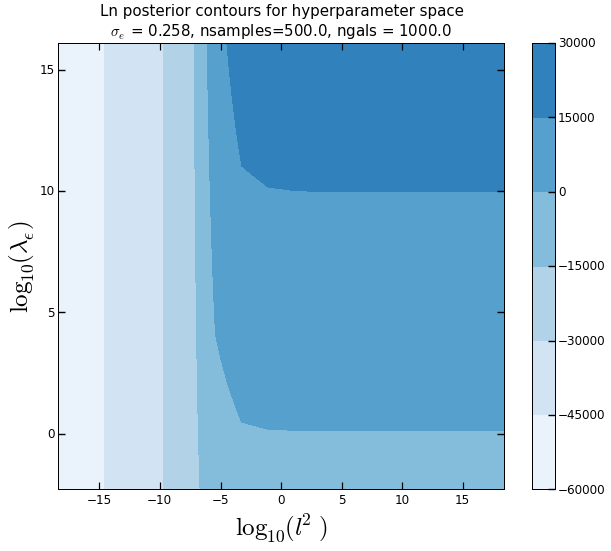

In [88]:
file1 = "/global/cscratch1/sd/karenyng/MagicBeans/outputs/lnp_values_sigma_e_0.258_samples_500.0_ngals_1000.0.txt"
sigma_e, nsamples, ngals = get_params(file1)

print (sigma_e, nsamples, ngals)

# %load /global/cscratch1/sd/karenyng/MagicBeans/outputs/lnp_values_sigma_e_0.258_samples_500.0_ngals_1000.0.txt
gp_hps = [ 
1.0,1e-08,0.1,1.0,1e-08,0.29552092352,1.0,1e-08,0.873326162383,1.0,1e-08,2.58086154042,1.0,1e-08,7.62698585902,1.0,1e-08,22.5393390473,1.0,1e-08,66.6084629081,1.0,1e-08,196.841944729,1.0,1e-08,581.709132937,1.0,1e-08,1719.07220186,1.0,1e-08,5080.21804691,1.0,1e-08,15013.1072891,1.0,1e-08,44366.8733098,1.0,1e-08,131113.393742,1.0,1e-08,387467.512046,1.0,1e-08,1145047.56994,1.0,1e-08,3383855.15343,1.0,1e-08,10000000.0,1.0,8.73326162383e-08,0.1,1.0,8.73326162383e-08,0.29552092352,1.0,8.73326162383e-08,0.873326162383,1.0,8.73326162383e-08,2.58086154042,1.0,8.73326162383e-08,7.62698585902,1.0,8.73326162383e-08,22.5393390473,1.0,8.73326162383e-08,66.6084629081,1.0,8.73326162383e-08,196.841944729,1.0,8.73326162383e-08,581.709132937,1.0,8.73326162383e-08,1719.07220186,1.0,8.73326162383e-08,5080.21804691,1.0,8.73326162383e-08,15013.1072891,1.0,8.73326162383e-08,44366.8733098,1.0,8.73326162383e-08,131113.393742,1.0,8.73326162383e-08,387467.512046,1.0,8.73326162383e-08,1145047.56994,1.0,8.73326162383e-08,3383855.15343,1.0,8.73326162383e-08,10000000.0,1.0,7.62698585902e-07,0.1,1.0,7.62698585902e-07,0.29552092352,1.0,7.62698585902e-07,0.873326162383,1.0,7.62698585902e-07,2.58086154042,1.0,7.62698585902e-07,7.62698585902,1.0,7.62698585902e-07,22.5393390473,1.0,7.62698585902e-07,66.6084629081,1.0,7.62698585902e-07,196.841944729,1.0,7.62698585902e-07,581.709132937,1.0,7.62698585902e-07,1719.07220186,1.0,7.62698585902e-07,5080.21804691,1.0,7.62698585902e-07,15013.1072891,1.0,7.62698585902e-07,44366.8733098,1.0,7.62698585902e-07,131113.393742,1.0,7.62698585902e-07,387467.512046,1.0,7.62698585902e-07,1145047.56994,1.0,7.62698585902e-07,3383855.15343,1.0,7.62698585902e-07,10000000.0,1.0,6.66084629081e-06,0.1,1.0,6.66084629081e-06,0.29552092352,1.0,6.66084629081e-06,0.873326162383,1.0,6.66084629081e-06,2.58086154042,1.0,6.66084629081e-06,7.62698585902,1.0,6.66084629081e-06,22.5393390473,1.0,6.66084629081e-06,66.6084629081,1.0,6.66084629081e-06,196.841944729,1.0,6.66084629081e-06,581.709132937,1.0,6.66084629081e-06,1719.07220186,1.0,6.66084629081e-06,5080.21804691,1.0,6.66084629081e-06,15013.1072891,1.0,6.66084629081e-06,44366.8733098,1.0,6.66084629081e-06,131113.393742,1.0,6.66084629081e-06,387467.512046,1.0,6.66084629081e-06,1145047.56994,1.0,6.66084629081e-06,3383855.15343,1.0,6.66084629081e-06,10000000.0,1.0,5.81709132937e-05,0.1,1.0,5.81709132937e-05,0.29552092352,1.0,5.81709132937e-05,0.873326162383,1.0,5.81709132937e-05,2.58086154042,1.0,5.81709132937e-05,7.62698585902,1.0,5.81709132937e-05,22.5393390473,1.0,5.81709132937e-05,66.6084629081,1.0,5.81709132937e-05,196.841944729,1.0,5.81709132937e-05,581.709132937,1.0,5.81709132937e-05,1719.07220186,1.0,5.81709132937e-05,5080.21804691,1.0,5.81709132937e-05,15013.1072891,1.0,5.81709132937e-05,44366.8733098,1.0,5.81709132937e-05,131113.393742,1.0,5.81709132937e-05,387467.512046,1.0,5.81709132937e-05,1145047.56994,1.0,5.81709132937e-05,3383855.15343,1.0,5.81709132937e-05,10000000.0,1.0,0.000508021804691,0.1,1.0,0.000508021804691,0.29552092352,1.0,0.000508021804691,0.873326162383,1.0,0.000508021804691,2.58086154042,1.0,0.000508021804691,7.62698585902,1.0,0.000508021804691,22.5393390473,1.0,0.000508021804691,66.6084629081,1.0,0.000508021804691,196.841944729,1.0,0.000508021804691,581.709132937,1.0,0.000508021804691,1719.07220186,1.0,0.000508021804691,5080.21804691,1.0,0.000508021804691,15013.1072891,1.0,0.000508021804691,44366.8733098,1.0,0.000508021804691,131113.393742,1.0,0.000508021804691,387467.512046,1.0,0.000508021804691,1145047.56994,1.0,0.000508021804691,3383855.15343,1.0,0.000508021804691,10000000.0,1.0,0.00443668733098,0.1,1.0,0.00443668733098,0.29552092352,1.0,0.00443668733098,0.873326162383,1.0,0.00443668733098,2.58086154042,1.0,0.00443668733098,7.62698585902,1.0,0.00443668733098,22.5393390473,1.0,0.00443668733098,66.6084629081,1.0,0.00443668733098,196.841944729,1.0,0.00443668733098,581.709132937,1.0,0.00443668733098,1719.07220186,1.0,0.00443668733098,5080.21804691,1.0,0.00443668733098,15013.1072891,1.0,0.00443668733098,44366.8733098,1.0,0.00443668733098,131113.393742,1.0,0.00443668733098,387467.512046,1.0,0.00443668733098,1145047.56994,1.0,0.00443668733098,3383855.15343,1.0,0.00443668733098,10000000.0,1.0,0.0387467512046,0.1,1.0,0.0387467512046,0.29552092352,1.0,0.0387467512046,0.873326162383,1.0,0.0387467512046,2.58086154042,1.0,0.0387467512046,7.62698585902,1.0,0.0387467512046,22.5393390473,1.0,0.0387467512046,66.6084629081,1.0,0.0387467512046,196.841944729,1.0,0.0387467512046,581.709132937,1.0,0.0387467512046,1719.07220186,1.0,0.0387467512046,5080.21804691,1.0,0.0387467512046,15013.1072891,1.0,0.0387467512046,44366.8733098,1.0,0.0387467512046,131113.393742,1.0,0.0387467512046,387467.512046,1.0,0.0387467512046,1145047.56994,1.0,0.0387467512046,3383855.15343,1.0,0.0387467512046,10000000.0,1.0,0.338385515343,0.1,1.0,0.338385515343,0.29552092352,1.0,0.338385515343,0.873326162383,1.0,0.338385515343,2.58086154042,1.0,0.338385515343,7.62698585902,1.0,0.338385515343,22.5393390473,1.0,0.338385515343,66.6084629081,1.0,0.338385515343,196.841944729,1.0,0.338385515343,581.709132937,1.0,0.338385515343,1719.07220186,1.0,0.338385515343,5080.21804691,1.0,0.338385515343,15013.1072891,1.0,0.338385515343,44366.8733098,1.0,0.338385515343,131113.393742,1.0,0.338385515343,387467.512046,1.0,0.338385515343,1145047.56994,1.0,0.338385515343,3383855.15343,1.0,0.338385515343,10000000.0,1.0,2.9552092352,0.1,1.0,2.9552092352,0.29552092352,1.0,2.9552092352,0.873326162383,1.0,2.9552092352,2.58086154042,1.0,2.9552092352,7.62698585902,1.0,2.9552092352,22.5393390473,1.0,2.9552092352,66.6084629081,1.0,2.9552092352,196.841944729,1.0,2.9552092352,581.709132937,1.0,2.9552092352,1719.07220186,1.0,2.9552092352,5080.21804691,1.0,2.9552092352,15013.1072891,1.0,2.9552092352,44366.8733098,1.0,2.9552092352,131113.393742,1.0,2.9552092352,387467.512046,1.0,2.9552092352,1145047.56994,1.0,2.9552092352,3383855.15343,1.0,2.9552092352,10000000.0,1.0,25.8086154042,0.1,1.0,25.8086154042,0.29552092352,1.0,25.8086154042,0.873326162383,1.0,25.8086154042,2.58086154042,1.0,25.8086154042,7.62698585902,1.0,25.8086154042,22.5393390473,1.0,25.8086154042,66.6084629081,1.0,25.8086154042,196.841944729,1.0,25.8086154042,581.709132937,1.0,25.8086154042,1719.07220186,1.0,25.8086154042,5080.21804691,1.0,25.8086154042,15013.1072891,1.0,25.8086154042,44366.8733098,1.0,25.8086154042,131113.393742,1.0,25.8086154042,387467.512046,1.0,25.8086154042,1145047.56994,1.0,25.8086154042,3383855.15343,1.0,25.8086154042,10000000.0,1.0,225.393390473,0.1,1.0,225.393390473,0.29552092352,1.0,225.393390473,0.873326162383,1.0,225.393390473,2.58086154042,1.0,225.393390473,7.62698585902,1.0,225.393390473,22.5393390473,1.0,225.393390473,66.6084629081,1.0,225.393390473,196.841944729,1.0,225.393390473,581.709132937,1.0,225.393390473,1719.07220186,1.0,225.393390473,5080.21804691,1.0,225.393390473,15013.1072891,1.0,225.393390473,44366.8733098,1.0,225.393390473,131113.393742,1.0,225.393390473,387467.512046,1.0,225.393390473,1145047.56994,1.0,225.393390473,3383855.15343,1.0,225.393390473,10000000.0,1.0,1968.41944729,0.1,1.0,1968.41944729,0.29552092352,1.0,1968.41944729,0.873326162383,1.0,1968.41944729,2.58086154042,1.0,1968.41944729,7.62698585902,1.0,1968.41944729,22.5393390473,1.0,1968.41944729,66.6084629081,1.0,1968.41944729,196.841944729,1.0,1968.41944729,581.709132937,1.0,1968.41944729,1719.07220186,1.0,1968.41944729,5080.21804691,1.0,1968.41944729,15013.1072891,1.0,1968.41944729,44366.8733098,1.0,1968.41944729,131113.393742,1.0,1968.41944729,387467.512046,1.0,1968.41944729,1145047.56994,1.0,1968.41944729,3383855.15343,1.0,1968.41944729,10000000.0,1.0,17190.7220186,0.1,1.0,17190.7220186,0.29552092352,1.0,17190.7220186,0.873326162383,1.0,17190.7220186,2.58086154042,1.0,17190.7220186,7.62698585902,1.0,17190.7220186,22.5393390473,1.0,17190.7220186,66.6084629081,1.0,17190.7220186,196.841944729,1.0,17190.7220186,581.709132937,1.0,17190.7220186,1719.07220186,1.0,17190.7220186,5080.21804691,1.0,17190.7220186,15013.1072891,1.0,17190.7220186,44366.8733098,1.0,17190.7220186,131113.393742,1.0,17190.7220186,387467.512046,1.0,17190.7220186,1145047.56994,1.0,17190.7220186,3383855.15343,1.0,17190.7220186,10000000.0,1.0,150131.072891,0.1,1.0,150131.072891,0.29552092352,1.0,150131.072891,0.873326162383,1.0,150131.072891,2.58086154042,1.0,150131.072891,7.62698585902,1.0,150131.072891,22.5393390473,1.0,150131.072891,66.6084629081,1.0,150131.072891,196.841944729,1.0,150131.072891,581.709132937,1.0,150131.072891,1719.07220186,1.0,150131.072891,5080.21804691,1.0,150131.072891,15013.1072891,1.0,150131.072891,44366.8733098,1.0,150131.072891,131113.393742,1.0,150131.072891,387467.512046,1.0,150131.072891,1145047.56994,1.0,150131.072891,3383855.15343,1.0,150131.072891,10000000.0,1.0,1311133.93742,0.1,1.0,1311133.93742,0.29552092352,1.0,1311133.93742,0.873326162383,1.0,1311133.93742,2.58086154042,1.0,1311133.93742,7.62698585902,1.0,1311133.93742,22.5393390473,1.0,1311133.93742,66.6084629081,1.0,1311133.93742,196.841944729,1.0,1311133.93742,581.709132937,1.0,1311133.93742,1719.07220186,1.0,1311133.93742,5080.21804691,1.0,1311133.93742,15013.1072891,1.0,1311133.93742,44366.8733098,1.0,1311133.93742,131113.393742,1.0,1311133.93742,387467.512046,1.0,1311133.93742,1145047.56994,1.0,1311133.93742,3383855.15343,1.0,1311133.93742,10000000.0,1.0,11450475.6994,0.1,1.0,11450475.6994,0.29552092352,1.0,11450475.6994,0.873326162383,1.0,11450475.6994,2.58086154042,1.0,11450475.6994,7.62698585902,1.0,11450475.6994,22.5393390473,1.0,11450475.6994,66.6084629081,1.0,11450475.6994,196.841944729,1.0,11450475.6994,581.709132937,1.0,11450475.6994,1719.07220186,1.0,11450475.6994,5080.21804691,1.0,11450475.6994,15013.1072891,1.0,11450475.6994,44366.8733098,1.0,11450475.6994,131113.393742,1.0,11450475.6994,387467.512046,1.0,11450475.6994,1145047.56994,1.0,11450475.6994,3383855.15343,1.0,11450475.6994,10000000.0,1.0,100000000.0,0.1,1.0,100000000.0,0.29552092352,1.0,100000000.0,0.873326162383,1.0,100000000.0,2.58086154042,1.0,100000000.0,7.62698585902,1.0,100000000.0,22.5393390473,1.0,100000000.0,66.6084629081,1.0,100000000.0,196.841944729,1.0,100000000.0,581.709132937,1.0,100000000.0,1719.07220186,1.0,100000000.0,5080.21804691,1.0,100000000.0,15013.1072891,1.0,100000000.0,44366.8733098,1.0,100000000.0,131113.393742,1.0,100000000.0,387467.512046,1.0,100000000.0,1145047.56994,1.0,100000000.0,3383855.15343,1.0,100000000.0,10000000.0
]

ln_posteriors = [ 
-56693.0,-56693.0,-56693.0,-56693.0,-56693.0,-56693.0,-56693.0,-56693.0,-56693.0,-56693.0,-56693.0,-56693.0,-56693.0,-56693.0,-56693.0,-56693.0,-56693.0,-56693.0,-50087.3,-50087.3,-50087.3,-50087.3,-50087.3,-50087.3,-50087.3,-50087.3,-50087.3,-50087.3,-50087.3,-50087.3,-50087.3,-50087.3,-50087.3,-50087.3,-50087.3,-50087.3,-43480.0,-43480.0,-43480.0,-43480.0,-43480.0,-43480.0,-43480.0,-43480.0,-43480.0,-43480.0,-43480.0,-43480.0,-43480.0,-43480.0,-43480.0,-43480.0,-43480.0,-43480.0,-36849.7,-36849.7,-36849.7,-36849.7,-36849.7,-36849.7,-36849.7,-36849.7,-36849.7,-36849.7,-36849.7,-36849.7,-36849.7,-36849.7,-36849.7,-36849.7,-36849.7,-36849.7,-30043.3,-30043.3,-30043.3,-30043.3,-30043.3,-30043.3,-30043.3,-30043.3,-30043.3,-30043.3,-30043.3,-30043.3,-30043.3,-30043.3,-30043.3,-30043.3,-30043.3,-30043.3,-20898.3,-20893.5,-20891.3,-20890.3,-20889.9,-20889.8,-20889.7,-20889.7,-20889.7,-20889.7,-20889.7,-20889.7,-20889.7,-20889.7,-20889.7,-20889.7,-20889.7,-20889.7,-6598.36,-5405.94,-4243.58,-3111.12,-2008.43,-935.365,108.159,1122.23,2106.99,3062.58,3989.2,4887.02,5756.16,6596.78,7409.03,8193.13,8949.38,9678.01,-4038.26,-2456.6,-881.213,687.875,2250.65,3807.07,5357.11,6900.71,8437.82,9968.39,11492.4,13009.7,14520.3,16024.2,17521.3,19011.6,20495.0,21971.4,-3748.22,-2110.36,-474.33,1159.86,2792.17,4422.61,6051.12,7677.65,9302.19,10924.7,12545.2,14163.5,15779.8,17393.8,19005.7,20615.4,22222.8,23828.0,-3709.65,-2061.51,-414.034,1232.72,2878.62,4523.71,6168.01,7811.41,9453.91,11095.6,12736.6,14376.6,16015.6,17653.7,19290.9,20927.1,22562.2,24196.4,-3704.05,-2053.12,-402.585,1247.49,2897.16,4546.39,6195.06,7843.21,9490.98,11138.5,12785.6,14432.3,16078.2,17723.5,19368.4,21013.0,22657.1,24300.4,-3703.78,-2052.43,-401.091,1250.2,2901.39,4552.33,6202.88,7853.04,9502.92,11152.6,12802.1,14451.3,16099.9,17748.1,19395.9,21043.6,22691.1,24338.5,-3703.78,-2052.42,-401.056,1250.3,2901.66,4553.01,6204.35,7855.64,9506.83,11157.8,12808.3,14458.5,16108.4,17758.2,19407.9,21057.6,22707.1,24356.2,-3703.78,-2052.42,-401.056,1250.3,2901.66,4553.02,6204.38,7855.74,9507.1,11158.5,12809.8,14461.1,16112.3,17763.2,19413.8,21063.9,22713.9,24363.7,-3703.78,-2052.42,-401.056,1250.3,2901.66,4553.02,6204.38,7855.74,9507.1,11158.5,12809.8,14461.2,16112.5,17763.9,19415.2,21066.5,22717.7,24368.6,-3703.78,-2052.42,-401.056,1250.3,2901.66,4553.02,6204.38,7855.74,9507.1,11158.5,12809.8,14461.2,16112.5,17763.9,19415.3,21066.6,22718.0,24369.3,-3703.78,-2052.42,-401.056,1250.3,2901.66,4553.02,6204.38,7855.74,9507.1,11158.5,12809.8,14461.2,16112.5,17763.9,19415.3,21066.6,22718.0,24369.3,-3703.78,-2052.42,-401.056,1250.3,2901.66,4553.02,6204.38,7855.74,9507.1,11158.5,12809.8,14461.2,16112.5,17763.9,19415.3,21066.6,22718.0,24369.3
]

gp_prec, gp_corr_var, gp_err_prec, lnp_surface = \
    reshape_thresher_outputs(gp_hps, ln_posteriors)
plot_hp_space_contours(gp_corr_var, gp_err_prec, lnp_surface, 
                       ngals, sigma_e, nsamples)